# Setup

In [2]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

from platform import python_version
print(f'python version: {python_version()}')

Conda Environment: ROICaT
python version: 3.9.16


In [3]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import natsort

import torch

import gc
import time
import functools
import multiprocessing as mp

import scipy

In [183]:
tic = time.time()
toc = {}
toc['start'] = time.time() - tic

In [184]:
%load_ext autoreload
%autoreload 2
import roicat
# from roicat import helpers, data_importing, ROInet
# from roicat.tracking import alignment, blurring, clustering, scatteringWaveletTransformer, similarity_graph, visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from bnpm import file_helpers

ModuleNotFoundError: No module named 'bnpm'

In [185]:
%matplotlib notebook

# Import paths

In [8]:
#directory_save_data_test = r'C:\Users\Richard Hakim\Desktop\tmp_data'
directory_save_data_test = r'C:\Users\Samuel\Documents\2PI\SP035\test_data'

path_data_test_zip = roicat.util.download_data_test_zip(directory_save_data_test)
roicat.helpers.extract_zip(path_zip=path_data_test_zip, path_extract=directory_save_data_test)

File already exists locally: C:\Users\Samuel\Documents\2PI\SP035\test_data\data_test.zip
Hash of local file matches provided hash_hex.
Extracting C:\Users\Samuel\Documents\2PI\SP035\test_data\data_test.zip to C:\Users\Samuel\Documents\2PI\SP035\test_data.
Completed zip extraction.


['C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0\\D1',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0\\D1\\ops.npy',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0\\D1\\stat.npy',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0\\D10',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0\\D10\\ops.npy',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0\\D10\\stat.npy',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0\\D11',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\test_data\\data__stat_ops_small__valerio_rbp10_plane0\\D11\\ops.npy',
 'C:\\Users\\Sam

In [186]:
directory_save_data_test = r'C:\Users\Samuel\Documents\2PI\SP035'


In [187]:
## Get paths to test data
paths_stat = roicat.helpers.find_paths(
#    dir_outer=str(Path(directory_save_data_test) / 'data__stat_ops_small__valerio_rbp10_plane0'),
    dir_outer=str(Path(directory_save_data_test) / 'RepSite2_chronic'),
    reMatch='stat.npy',
    find_files=True,
    find_folders=False,
    depth=2,
    natsorted=True,
)
paths_ops = [str(Path(p).parent / 'ops.npy') for p in paths_stat]
assert all([Path(p).exists() for p in paths_stat]), 'FR Error: one or more stat.npy files do not exist.'
assert all([Path(p).exists() for p in paths_ops]), 'FR Error: one or more ops.npy files do not exist.'
print(f'Found {len(paths_stat)} stat.npy files and {len(paths_ops)} ops.npy files.')


Found 3 stat.npy files and 3 ops.npy files.


In [188]:
# dir_allOuterFolders = Path(r"/media/rich/bigSSD/other lab data/Harnett_lab/ROI_Tracking/Vincent_Valerio/4th_email/AllStatFiles/rbp16").resolve()
# dir_allOuterFolders = Path(r"/media/rich/bigSSD/res2p/scanimage data/round 5 experiments/mouse 2_6/just_stat_files").resolve()
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/Sofia_ROIs/Data for Rich/SS33/").resolve())
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_1511L/statFiles/").resolve())
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/").resolve())
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8").resolve())
# dir_allOuterFolders = str(Path(r"/home/rich/Downloads/NN11/").resolve())
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/NN9").resolve())
dir_allOuterFolders = str(Path(directory_save_data_test) / 'RepSite2_chronic')

# folders_allSessions = natsort.natsorted(helpers.get_dir_contents(dir_allOuterFolders)[0])[:]

# dir_allS2pFolders = [dir_allOuterFolders / folder for folder in folders_allSessions]

pathSuffixToStat = 'stat.npy'
pathSuffixToOps = 'ops.npy'
# pathSuffixToStat = 'Slice02/stat.npy'
# pathSuffixToOps = 'Slice02/ops.npy'

# paths_allStat = np.array([path / pathSuffixToStat for path in dir_allS2pFolders])[:]
paths_allStat = test = roicat.helpers.find_paths(
    dir_outer=dir_allOuterFolders,
    reMatch=pathSuffixToStat,
    depth=4,
)[:]
# paths_allOps  = np.array([path / pathSuffixToOps for path in dir_allS2pFolders])[:]
paths_allOps = test = roicat.helpers.find_paths(
    dir_outer=dir_allOuterFolders,
    reMatch=pathSuffixToOps,
    depth=4,
)[:]
# paths_allStat = np.array([path / pathSuffixToStat for path in dir_allS2pFolders])
# paths_allOps  = np.array([path / pathSuffixToOps for path in dir_allS2pFolders])

# print(f'folder names of all sessions: \n{display(folders_allSessions)}')
print(f'paths to all stat files:');
[print(path) for path in paths_allStat];
print('');
print(f'paths to all ops files:');
[print(path) for path in paths_allOps];


paths to all stat files:
C:\Users\Samuel\Documents\2PI\SP035\RepSite2_chronic\2023-02-24\stat.npy
C:\Users\Samuel\Documents\2PI\SP035\RepSite2_chronic\2023-03-01\stat.npy
C:\Users\Samuel\Documents\2PI\SP035\RepSite2_chronic\2023-03-03\stat.npy

paths to all ops files:
C:\Users\Samuel\Documents\2PI\SP035\RepSite2_chronic\2023-02-24\ops.npy
C:\Users\Samuel\Documents\2PI\SP035\RepSite2_chronic\2023-03-01\ops.npy
C:\Users\Samuel\Documents\2PI\SP035\RepSite2_chronic\2023-03-03\ops.npy


In [189]:
paths_allStat

['C:\\Users\\Samuel\\Documents\\2PI\\SP035\\RepSite2_chronic\\2023-02-24\\stat.npy',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\RepSite2_chronic\\2023-03-01\\stat.npy',
 'C:\\Users\\Samuel\\Documents\\2PI\\SP035\\RepSite2_chronic\\2023-03-03\\stat.npy']

In [190]:
toc['import_paths'] = time.time() - tic

# Import data

In [191]:
toc['import_data'] = time.time() - tic

In [192]:
data = roicat.data_importing.Data_suite2p(
    paths_statFiles=paths_allStat[:],
    paths_opsFiles=paths_allOps[:],
    um_per_pixel=4.0,
    new_or_old_suite2p='new',

    out_height_width=[36,36],
    
    type_meanImg='meanImgE',
#     FOV_images=FOVs_mixed,

    verbose=True,
)

# data = roicat.data_importing.Data_suite2p(
#     paths_statFiles=paths_allStat[:],
# #     paths_opsFiles=paths_allOps[:],
#     um_per_pixel=4.0,
#     new_or_old_suite2p='new',

#     out_height_width=[36,36],
    
# #     type_meanImg='meanImgE',
#     FOV_images=FOVs_mixed,

#     verbose=True,
# )

assert data.check_completeness(verbose=False)['tracking'], f"Data object is missing attributes necessary for tracking."

Starting: Importing FOV images from ops files
Completed: Set FOV_height and FOV_width successfully.
Completed: Imported 3 FOV images.
Completed: Set FOV_images for 3 sessions successfully.
Importing spatial footprints from stat files.


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.89it/s]


Imported 3 sessions of spatial footprints into sparse arrays.
Completed: Set spatialFootprints for 3 sessions successfully.
Completed: Created sessionID_concat.
Completed: Created centroids.
Staring: Creating centered ROI images from spatial footprints...
Completed: Created ROI images.


<IPython.core.display.Javascript object>


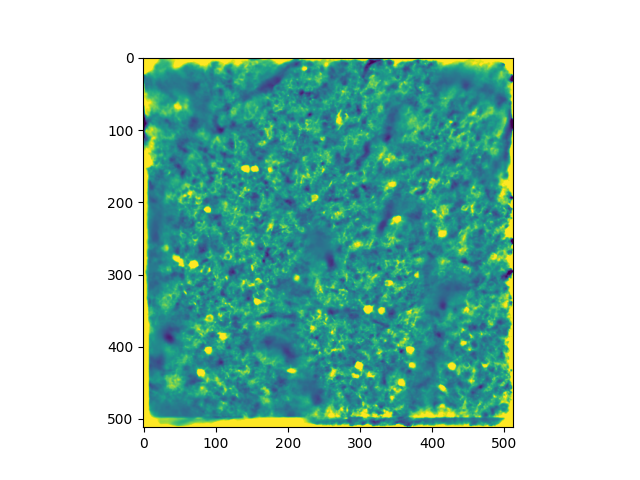

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


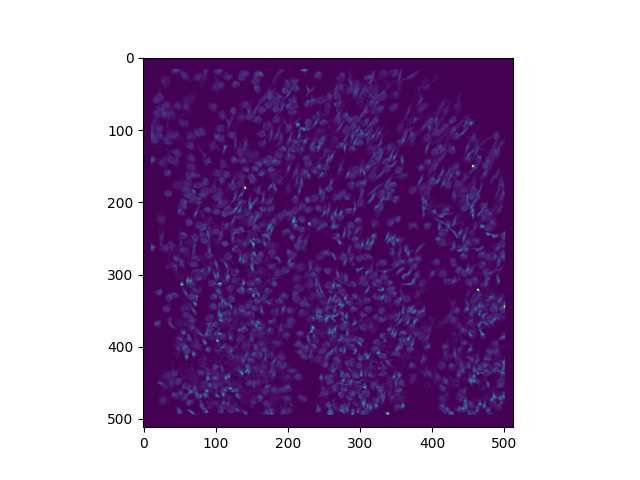

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


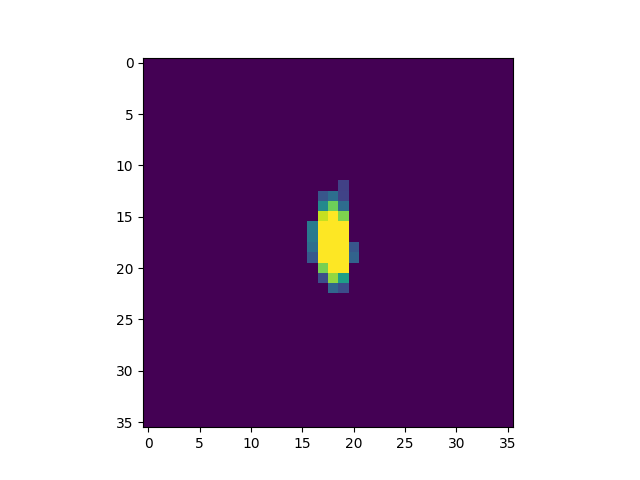

interactive(children=(IntSlider(value=0, description='i_frame', max=4369), Output()), _dom_classes=('widget-in…

In [193]:
%matplotlib notebook

roicat.visualization.display_toggle_image_stack(data.FOV_images, clim=[0,1])

roicat.visualization.display_toggle_image_stack([sf.max(0).reshape(data.FOV_height, data.FOV_width).toarray() for sf in data.spatialFootprints], clim=[0,0.1])

roicat.visualization.display_toggle_image_stack(np.concatenate(data.ROI_images, axis=0))

# Alignment

In [194]:
use_CLAHE = True

position_session_template = 0.5
roi_FOV_image_mixing_factor = 0.5

idx_st = int(position_session_template * data.n_sessions) if type(position_session_template) is float else position_session_template

FOV_images = [f + np.array(roi_FOV_image_mixing_factor*(sf.multiply(1/sf.max(1).A)).sum(0).reshape(data.FOV_height, data.FOV_width)) for f, sf in zip(data.FOV_images, data.spatialFootprints)]
FOV_images = [roicat.tracking.alignment.clahe(im, grid_size=1, clipLimit=1, normalize=True) for im in FOV_images] if use_CLAHE else FOV_images

# import copy
# FOV_images = copy.deepcopy(data.FOV_images)

<IPython.core.display.Javascript object>


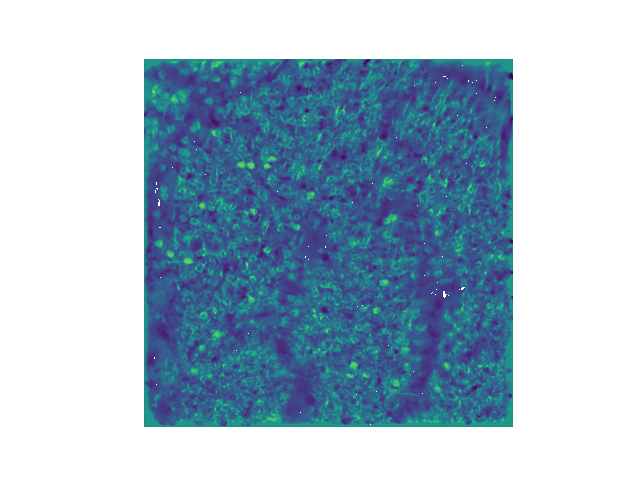

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

In [195]:
%matplotlib notebook

roicat.visualization.display_toggle_image_stack(FOV_images)

In [209]:
aligner = roicat.tracking.alignment.Aligner(verbose=True)
geo_out = aligner.fit_geometric(
#    template=FOV_images[0],
    template=0,
    ims_moving=FOV_images,
    template_method='sequential',
    mode_transform='translation',
    mask_borders=(50,50,100,50),
    n_iter=50,
    termination_eps=1e-09,
    gaussFiltSize=31,
    auto_fix_gaussFilt_step=5,
)

aligner.transform_images_geometric(FOV_images);


Finding geometric registration warps with mode: translation, template_method: sequential, mask_borders: True


Finding geometric registration warps:   0%|                                                      | 0/3 [00:00<?, ?it/s]

Error finding geometric registration warp for image 1: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\video\src\ecc.cpp:589: error: (-7:Iterations do not converge) The algorithm stopped before its convergence. The correlation is going to be minimized. Images may be uncorrelated or non-overlapped in function 'cv::findTransformECC'

Increasing gaussFiltSize by 5 to 36
Error finding geometric registration warp for image 2: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\video\src\ecc.cpp:589: error: (-7:Iterations do not converge) The algorithm stopped before its convergence. The correlation is going to be minimized. Images may be uncorrelated or non-overlapped in function 'cv::findTransformECC'

Increasing gaussFiltSize by 5 to 36
Error finding geometric registration warp for image 2: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\video\src\ecc.cpp:589: error: (-7:Iterations do not converge) The algorithm stopped before its convergence. The cor

Finding geometric registration warps: 100%|██████████████████████████████████████████████| 3/3 [00:00<00:00, 10.15it/s]

Composing geometric warp matrices...
Applying geometric registration warps to images...


In [210]:
nonrigid_out = aligner.fit_nonrigid(
    template=FOV_images[0],
#     template=0,
    ims_moving=aligner.ims_registered_geo,
    remappingIdx_init=aligner.remappingIdx_geo,
    template_method='image',
    mode_transform='createOptFlow_DeepFlow',
    kwargs_mode_transform=None,
)

aligner.transform_images_nonrigid(FOV_images);

Finding nonrigid registration warps with mode: createOptFlow_DeepFlow, template_method: image


Finding nonrigid registration warps: 100%|████████████████████████████████████████████| 3/3 [00:01<00:00,  1.94image/s]

Composing nonrigid warp matrices...
Applying nonrigid registration warps to images...


In [211]:
aligner.transform_ROIs(
    ROIs=data.spatialFootprints, 
    remappingIdx=aligner.remappingIdx_nonrigid,
    normalize=True,
);

Registering ROIs...



100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:02<00:00, 419.97it/s]

100%|█████████████████████████████████████████████████████████████████████████████| 1529/1529 [00:03<00:00, 413.60it/s]

100%|█████████████████████████████████████████████████████████████████████████████| 1627/1627 [00:03<00:00, 420.87it/s]

Registering ROIs: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.81s/it]


<IPython.core.display.Javascript object>


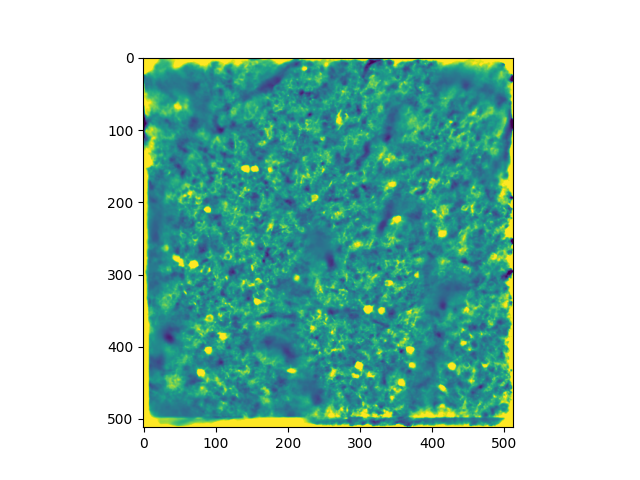

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


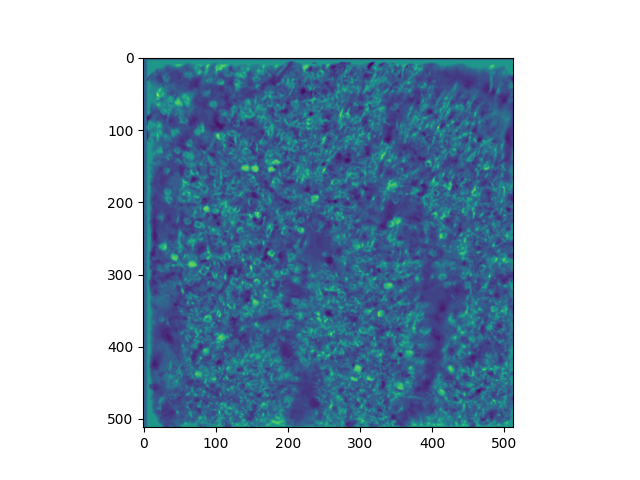

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


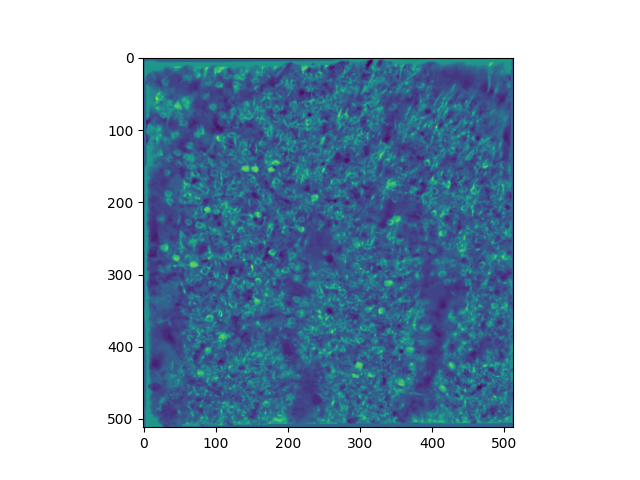

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


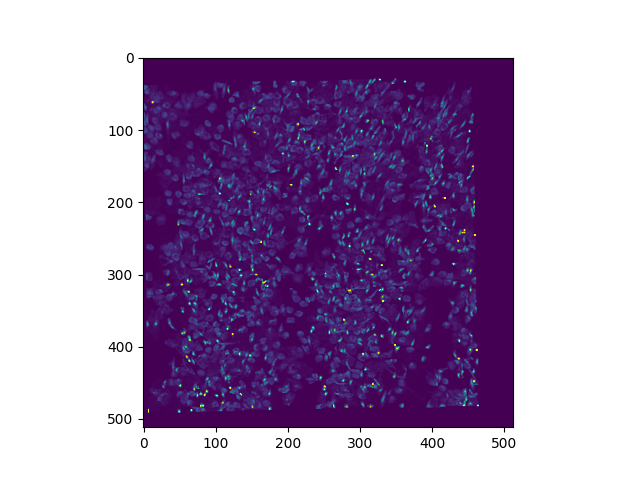

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

In [212]:
%matplotlib notebook

roicat.visualization.display_toggle_image_stack(data.FOV_images)
roicat.visualization.display_toggle_image_stack(aligner.ims_registered_geo)
roicat.visualization.display_toggle_image_stack(aligner.ims_registered_nonrigid)
roicat.visualization.display_toggle_image_stack(aligner.get_ROIsAligned_maxIntensityProjection(), clim=[0,0.1])
#roicat.visualization.display_toggle_2channel_image_stack(aligner.get_flowFields()) #for images with 2 channels

In [213]:
toc['alignment'] = time.time() - tic

## Blur ROIs (optional)

In [214]:
blurrer = roicat.tracking.blurring.ROI_Blurrer(
    frame_shape=(data.FOV_height, data.FOV_width),
    kernel_halfWidth=2,
    plot_kernel=False,
)

blurrer.blur_ROIs(
    spatialFootprints=aligner.ROIs_aligned[:],
)

Preparing the Toeplitz convolution matrix
Performing convolution for blurring


<IPython.core.display.Javascript object>


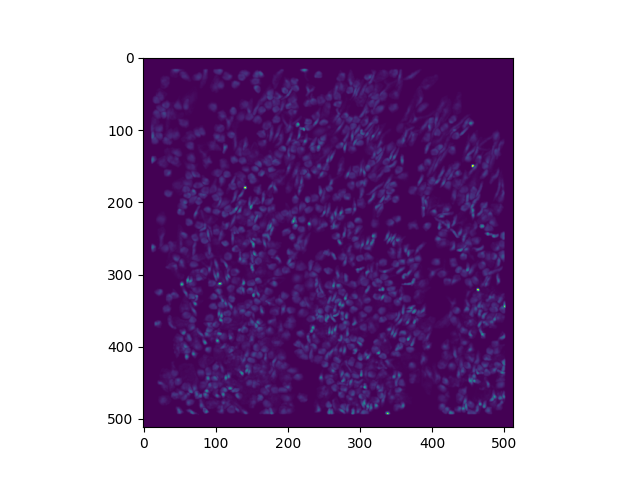

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

In [215]:
%matplotlib notebook
roicat.visualization.display_toggle_image_stack(blurrer.get_ROIsBlurred_maxIntensityProjection(), clim=[0,0.1])

In [216]:
toc['blur'] = time.time() - tic

## Neural network embedding distances

In [217]:
roinet = roicat.ROInet.ROInet_embedder(
    device='cuda:0',
    dir_networkFiles=r'/home/rich/Desktop/tmp_data/',
    download_method='check_local_first',
    download_url='https://osf.io/x3fd2/download',
    download_hash='7a5fb8ad94b110037785a46b9463ea94',
    forward_pass_version='latent',
    verbose=True,
)

File already exists locally: C:\home\rich\Desktop\tmp_data\ROInet.zip
Hash of local file matches provided hash_hex.
Extracting C:\home\rich\Desktop\tmp_data\ROInet.zip to C:\home\rich\Desktop\tmp_data.
Completed zip extraction.
['C:\\home\\rich\\Desktop\\tmp_data\\ROInet_tracking_20220527', 'C:\\home\\rich\\Desktop\\tmp_data\\ROInet_tracking_20220527\\params.json', 'C:\\home\\rich\\Desktop\\tmp_data\\ROInet_tracking_20220527\\ReadMe.txt', 'C:\\home\\rich\\Desktop\\tmp_data\\ROInet_tracking_20220527\\model.py', 'C:\\home\\rich\\Desktop\\tmp_data\\ROInet_tracking_20220527\\ConvNext_tiny__1_0_best__simCLR.pth']
Imported model from C:\home\rich\Desktop\tmp_data\ROInet_tracking_20220527\model.py
Loaded params_model from C:\home\rich\Desktop\tmp_data\ROInet_tracking_20220527\params.json


C:\Users\Samuel\anaconda3\envs\ROICaT\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Samuel\anaconda3\envs\ROICaT\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from C:\home\rich\Desktop\tmp_data\ROInet_tracking_20220527\ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cuda:0


In [218]:
roinet.generate_dataloader(
    ROI_images=data.ROI_images,
    um_per_pixel=data.um_per_pixel,
    pref_plot=False,
    
    jit_script_transforms=False,#True,
    
    batchSize_dataloader=8,
    pinMemory_dataloader=True,
    numWorkers_dataloader=mp.cpu_count(),
    persistentWorkers_dataloader=True,
    prefetchFactor_dataloader=2,    

#     batchSize_dataloader=1,
#     pinMemory_dataloader=False,
#     numWorkers_dataloader=0,
#     persistentWorkers_dataloader=False,
#     prefetchFactor_dataloader=2,    
);

Starting: resizing ROIs
Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader


<IPython.core.display.Javascript object>


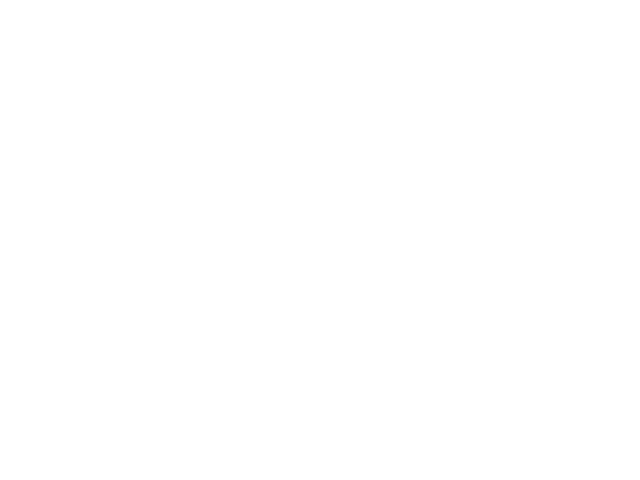

interactive(children=(IntSlider(value=0, description='i_frame', max=4369), Output()), _dom_classes=('widget-in…

interactive(children=(IntSlider(value=0, description='i_frame', max=4369), Output()), _dom_classes=('widget-in…

In [219]:
%matplotlib notebook
roicat.visualization.display_toggle_image_stack(roinet.ROI_images_rs, clim=[0, 0.05])

In [220]:
roinet.generate_latents();


starting: running data through network


100%|████████████████████████████████████████████████████████████████████████████████| 547/547 [00:35<00:00, 15.42it/s]

completed: running data through network


In [221]:
gc.collect()
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

In [222]:
toc['NN'] = time.time() - tic

## Scattering wavelet embedding distances

In [223]:
swt = roicat.tracking.scatteringWaveletTransformer.SWT(
    kwargs_Scattering2D={'J': 2, 'L': 2}, 
    image_shape=data.ROI_images[0].shape[1:3], 
    device='cuda:0'
)

swt.transform(
    ROI_images=np.concatenate(data.ROI_images, axis=0),
    batch_size=100,
);

SWT initialized
Starting: SWT transform on ROIs


  0%|                                                                                         | 0/43.7 [00:00<?, ?it/s]C:\Users\Samuel\AppData\Roaming\Python\Python39\site-packages\tqdm\std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
101%|███████████████████████████████████████████████████████████████████████████████| 44/43.7 [00:00<00:00, 133.33it/s]

Completed: SWT transform on ROIs


In [224]:
gc.collect()
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()


In [225]:
toc['SWT'] = time.time() - tic

## Compute similarities

<IPython.core.display.Javascript object>


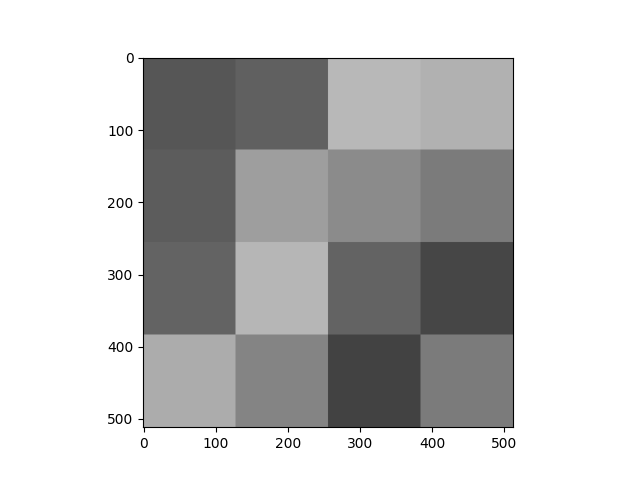

Computing pairwise similarity between ROIs...


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:01<00:00,  9.77it/s]

Joining blocks into full similarity matrices...
Joining s_sf...
Joining s_NN...
Joining s_SWT...
Joining s_sesh...


In [226]:
sim = roicat.tracking.similarity_graph.ROI_graph(
    n_workers=-1,
    frame_height=data.FOV_height,
    frame_width=data.FOV_width,
#     block_height=data.FOV_height,
#     block_width=data.FOV_width,
    block_height=128,
    block_width=128,
    algorithm_nearestNeigbors_spatialFootprints='brute',
    verbose=True,
)

sim.visualize_blocks()

s_sf, s_NN, s_SWT, s_sesh = sim.compute_similarity_blockwise(
    spatialFootprints=blurrer.ROIs_blurred,
#    spatialFootprints=aligner.ROIs_aligned,
    features_NN=roinet.latents,
    features_SWT=swt.latents,
    ROI_session_bool=data.sessionID_concat,
    spatialFootprint_maskPower=1.0,
);

In [227]:
sim.make_normalized_similarities(
    centers_of_mass=data.centroids,
    features_NN=roinet.latents,
    features_SWT=swt.latents,
#     features_SWT=None,
    k_max=4000,
    k_min=100,
    algo_NN='kd_tree',
    device='cuda:0'
)

toc['sim'] = time.time() - tic

Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


100%|████████████████████████████████████████████████████████████████████████████| 4370/4370 [00:00<00:00, 4428.29it/s]


Normalizing SWT similarity scores...


100%|████████████████████████████████████████████████████████████████████████████| 4370/4370 [00:01<00:00, 2430.32it/s]


# Clustering

In [228]:
clusterer = roicat.tracking.clustering.Clusterer(
    s_sf=sim.s_sf,
    s_NN_z=sim.s_NN_z,
    s_SWT_z=sim.s_SWT_z,
    s_sesh=sim.s_sesh,
)

kwargs_makeConjunctiveDistanceMatrix_best = clusterer.find_optimal_parameters_for_pruning(
    n_bins=50,
    find_parameters_automatically=True,
    kwargs_findParameters={
        'n_patience': 100,
        'tol_frac': 0.05,
        'max_trials': 350,
        'max_duration': 60*10,
        'verbose': False,
    },
    bounds_findParameters={
        'power_SF': (0.3, 2),
        'power_NN': (0.2, 2),
        'power_SWT': (0.1, 1),
        'p_norm': (-5, 5),
        'sig_NN_kwargs_mu': (0, 0.5),
        'sig_NN_kwargs_b': (0.05, 2),
        'sig_SWT_kwargs_mu': (0, 0.5),
        'sig_SWT_kwargs_b': (0.05, 2),
    },
    n_jobs_findParameters=-1,    
#     fallback_d_cutoff=0.5,
#     plot_pref=True,
)

toc['separate_diffSame'] = time.time() - tic

Finding mixing parameters using automated hyperparameter tuning...
Best value found: 0.06981319934129715 with parameters {'power_SF': 1.1033491738185872, 'power_NN': 0.6939924596713063, 'power_SWT': 0.37519551272433416, 'p_norm': -2.1765585911556453, 'sig_SF_kwargs': None, 'sig_NN_kwargs': {'mu': 0.04426405715461196, 'b': 0.12134584975977909}, 'sig_SWT_kwargs': {'mu': 0.19074903681218275, 'b': 1.2639313612190968}}


<IPython.core.display.Javascript object>


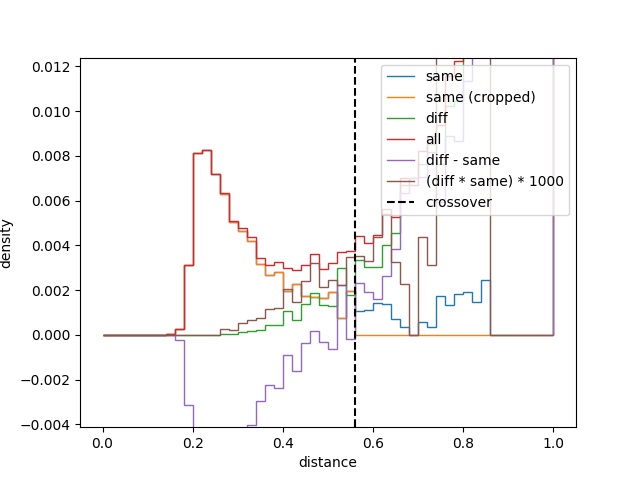

<IPython.core.display.Javascript object>


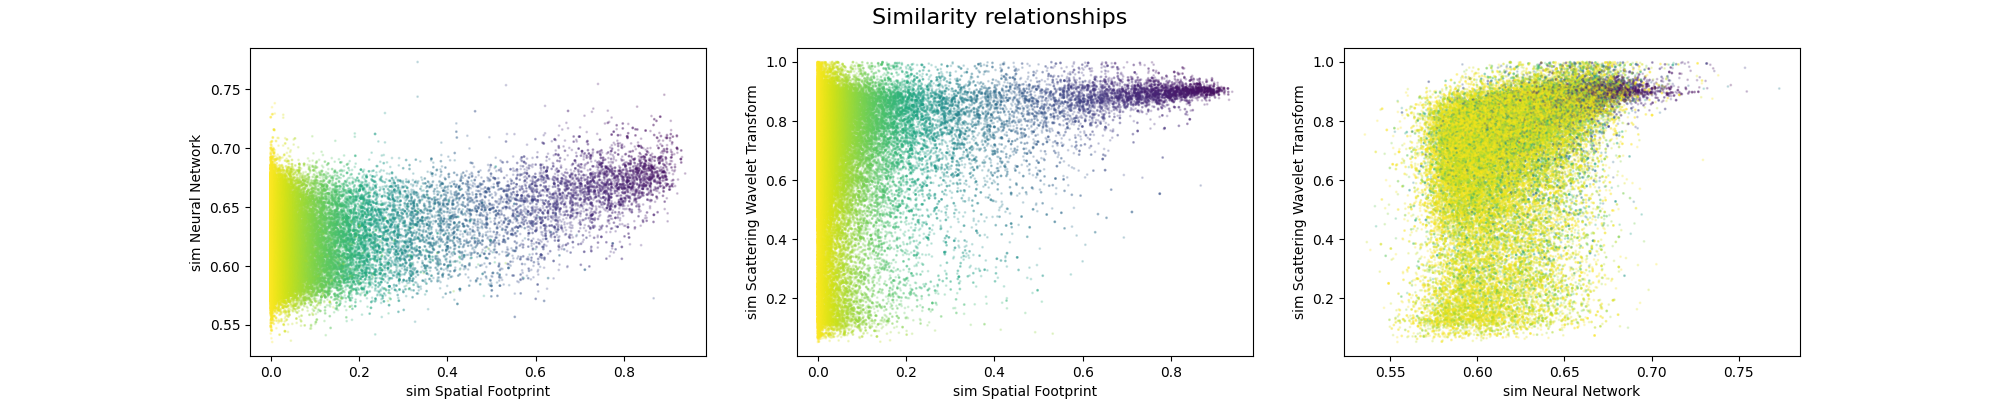

In [229]:
clusterer.plot_distSame()

clusterer.plot_similarity_relationships(
    plots_to_show=[1,2,3], 
    max_samples=100000, 
    kwargs_scatter={'s':1, 'alpha':0.2},
    kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
#     kwargs_makeConjunctiveDistanceMatrix={
#         'power_SF': 1.0,
#         'power_NN': 1.0,
#         'power_SWT': 0.1,
#         'p_norm': -4.0,
#         'sig_SF_kwargs': {'mu':0.5, 'b':4},
# #         'sig_SF_kwargs': None,
#         'sig_NN_kwargs': {'mu':0.5, 'b':1.5},
#         'sig_SWT_kwargs': {'mu':0.5, 'b':0.5},
#     },
);

In [230]:
clusterer.make_pruned_similarity_graphs(
    d_cutoff=None,
    kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
    stringency=0.6,
)

Pruning similarity graphs with d_cutoff = 0.3992024064064026...


C:\Users\Samuel\AppData\Roaming\Python\Python39\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [231]:
if data.n_sessions >= 8:
    labels = clusterer.fit(
        session_bool=data.sessionID_concat,
        min_cluster_size=2,
        cluster_selection_method='leaf',
        d_clusterMerge=None,
        alpha=0.999,
        n_iter_violationCorrection=6,
        d_conj=None,
        kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
    #     kwargs_makeConjunctiveDistanceMatrix={
    #         'power_SF': 1.0,
    #         'power_NN': 1.0,
    #         'power_SWT': 0.1,
    #         'p_norm': -2,
    #         'sig_SF_kwargs': None,
    #         'sig_NN_kwargs':  {'mu':0, 'b':0.2},
    #         'sig_SWT_kwargs': {'mu':0, 'b':0.2},
    #     },
        split_intraSession_clusters=True,
        discard_failed_pruning=True,
        d_step=0.01,
    )

else:
    labels = clusterer.fit_sequentialHungarian(
        session_bool=data.sessionID_concat,
        thresh_cost=0.6,
        d_conj=None,
        kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
    #     kwargs_makeConjunctiveDistanceMatrix={
    #     'power_SF': 1.0,
    #     'power_NN': 1.0,
    #     'power_SWT': 0.1,
    #     'p_norm': -2,
    #     'sig_SF_kwargs': None,
    #     'sig_NN_kwargs':  {'mu':0, 'b':0.2},
    #     'sig_SWT_kwargs': {'mu':0, 'b':0.2},
    #     },
    )

labels_bySession = [labels[idx] for idx in data.sessionID_concat.T]

Clustering with CaImAn's sequential Hungarian algorithm method...


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.48it/s]


In [232]:
labels_allSessions = labels.copy()
uniqueClusters, countsClusters = np.unique(labels, return_counts=True)
labels_allSessions[np.isin(labels, uniqueClusters[countsClusters < data.n_sessions])] = -1
uniqueClustersAllSessions, countsClustersAllSessions = np.unique(labels_allSessions, return_counts=True)

In [233]:
## results_clustering
print(f'Number of ROIs appearing in >1 session: {len(uniqueClusters)-1}')
print(f'Number of ROIs appearing in all sessions: {np.sum(countsClusters==data.n_sessions)}')
print(f'Number of ROIs appearing in all sessions: {len(uniqueClustersAllSessions)-1}') #sanity check
print(f'Number of discarded ROIs: {(labels==-1).sum()}')


Number of ROIs appearing in >1 session: 1085
Number of ROIs appearing in all sessions: 505
Number of ROIs appearing in all sessions: 505
Number of discarded ROIs: 1695


In [234]:
toc['clustering'] = time.time() - tic

# Visualize results

In [242]:
FOV_clusters = roicat.visualization.compute_colored_FOV(
    spatialFootprints=[r.power(0.7) for r in aligner.ROIs_aligned],
    FOV_height=data.FOV_height,
    FOV_width=data.FOV_width,
    boolSessionID=data.sessionID_concat,
    labels=labels_allSessions,
    confidence=None,
)

<IPython.core.display.Javascript object>


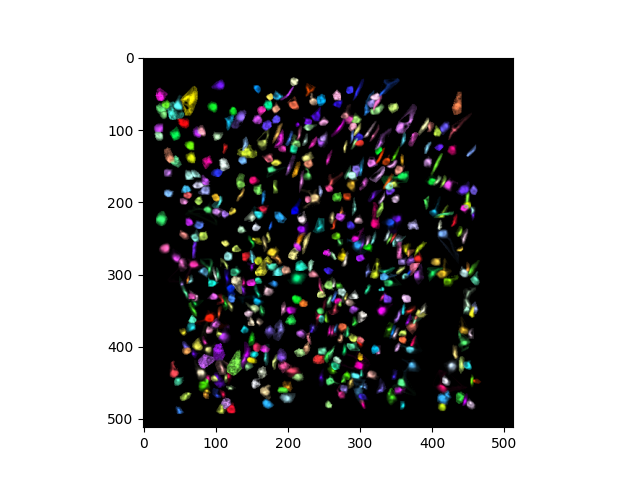

interactive(children=(IntSlider(value=0, description='i_frame', max=2), Output()), _dom_classes=('widget-inter…

In [243]:
%matplotlib notebook
roicat.visualization.display_toggle_image_stack(
    FOV_clusters, 
#     interpolation='none', 
#     filternorm=False, 
#     resample=False
)


In [244]:
#save each image as an svg

import matplotlib

matplotlib.use('Agg') #non-interactive mode

import matplotlib.pyplot as plt

dir_save = Path(dir_allOuterFolders).resolve()
name_save = Path(dir_allOuterFolders).resolve().name

for iSess in range(np.shape(FOV_clusters)[0]):
    fig = plt.figure()
    plt.imshow(FOV_clusters[iSess])

    path_save_svg = dir_save / (name_save + '.ROICaT.FOVclusters_allSessions.session' + str(iSess) + '.svg')

    plt.savefig(path_save_svg, dpi=150)
    plt.close(fig)

    

C:\Users\Samuel\AppData\Local\Temp\ipykernel_34036\3271987748.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(40,1))


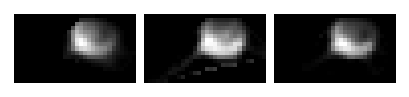

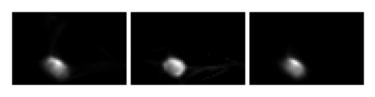

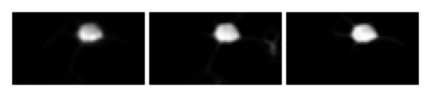

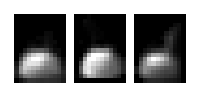

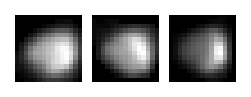

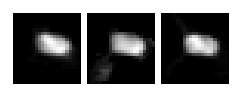

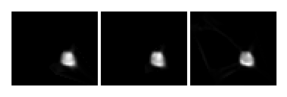

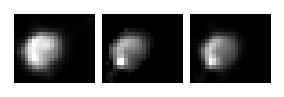

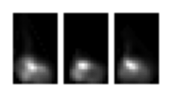

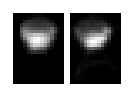

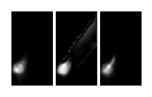

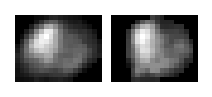

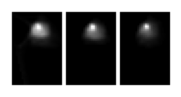

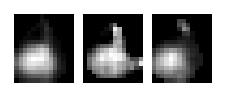

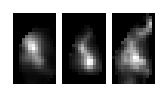

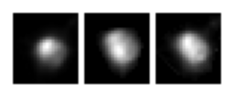

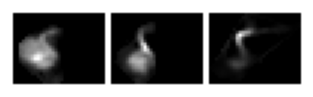

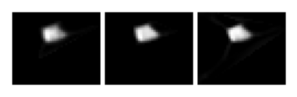

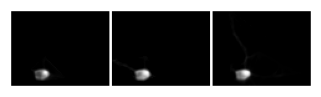

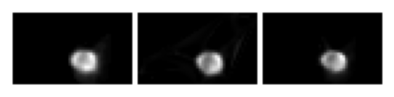

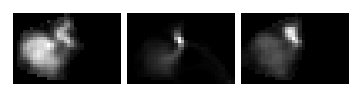

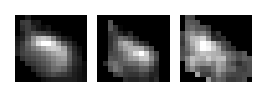

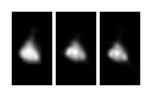

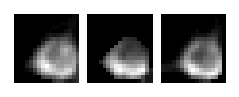

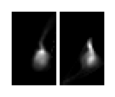

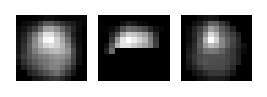

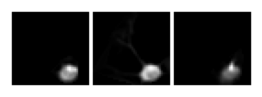

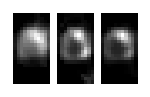

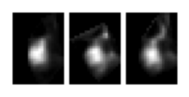

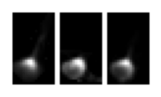

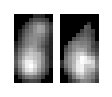

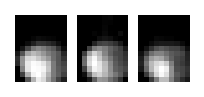

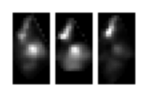

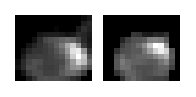

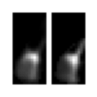

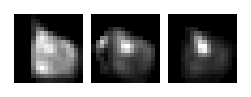

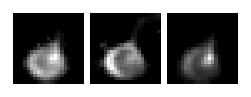

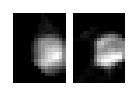

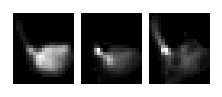

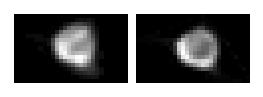

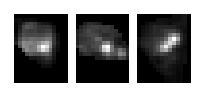

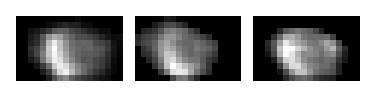

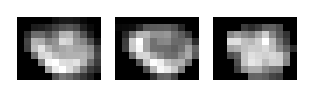

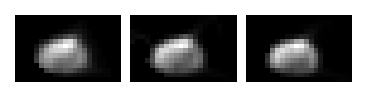

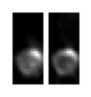

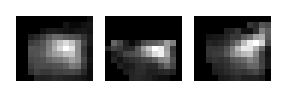

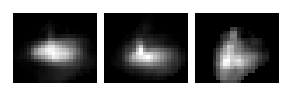

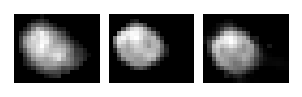

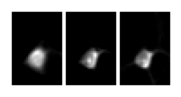

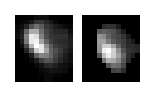

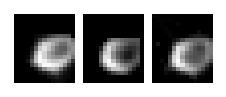

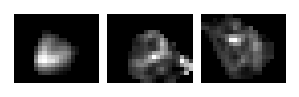

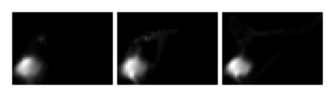

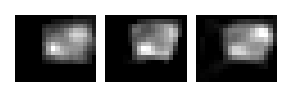

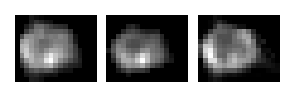

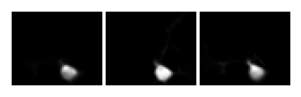

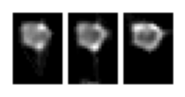

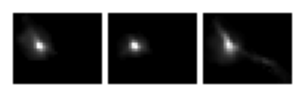

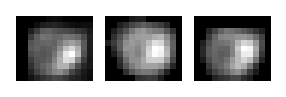

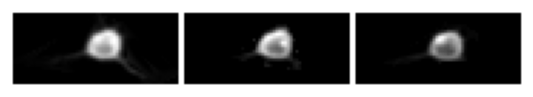

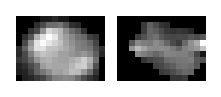

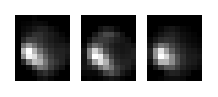

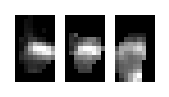

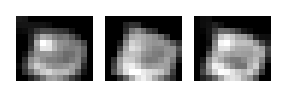

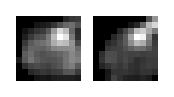

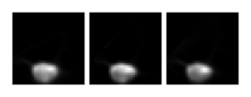

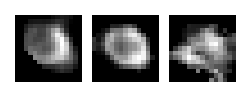

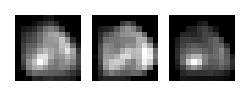

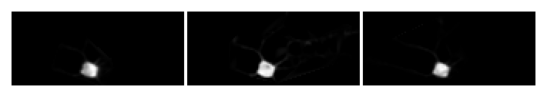

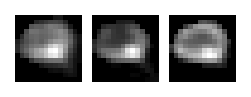

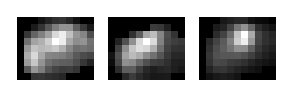

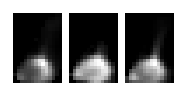

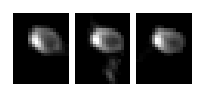

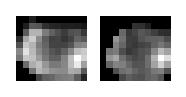

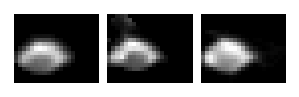

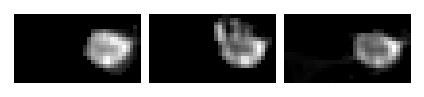

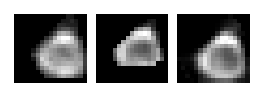

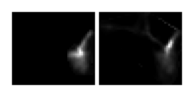

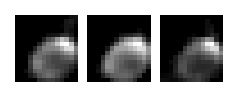

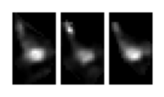

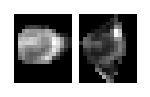

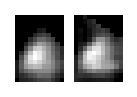

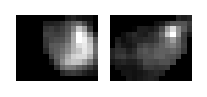

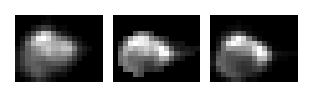

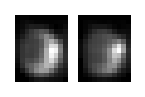

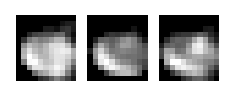

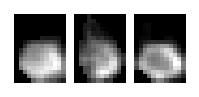

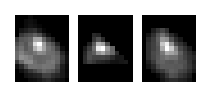

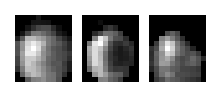

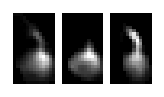

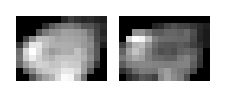

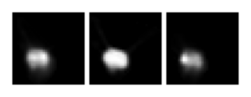

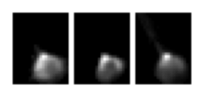

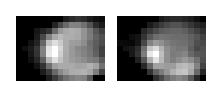

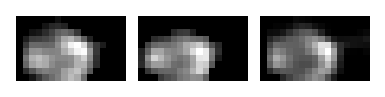

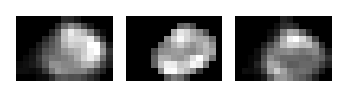

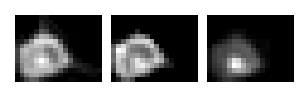

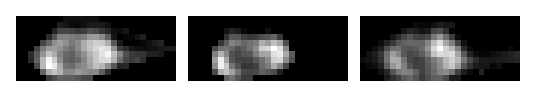

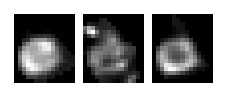

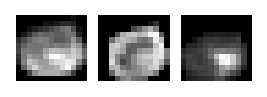

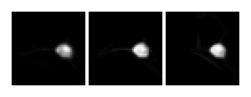

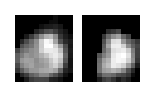

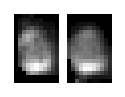

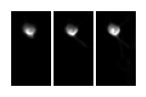

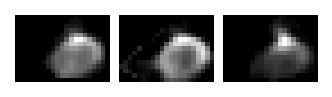

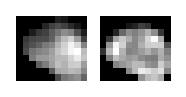

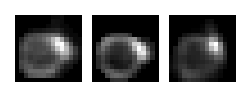

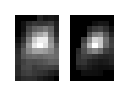

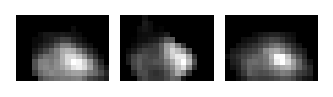

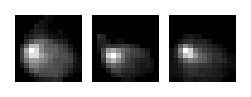

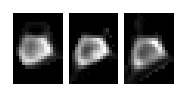

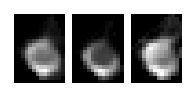

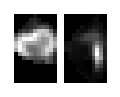

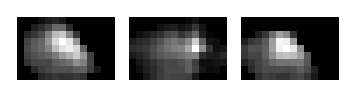

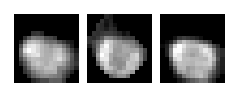

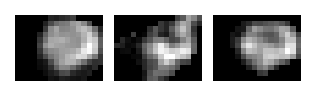

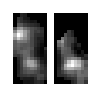

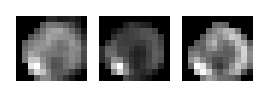

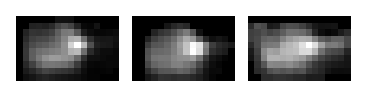

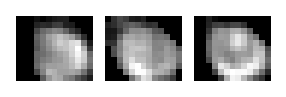

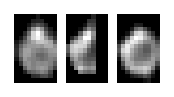

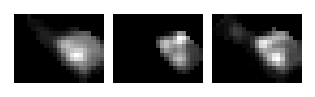

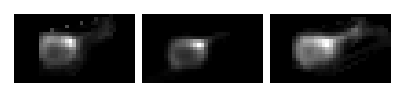

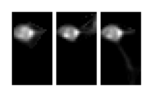

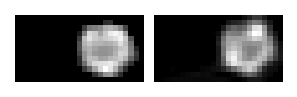

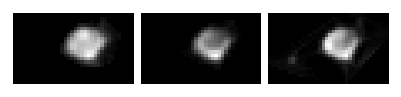

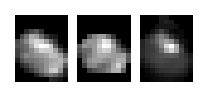

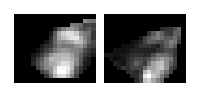

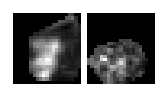

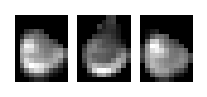

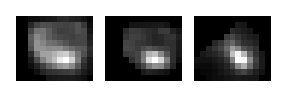

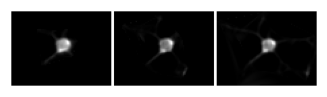

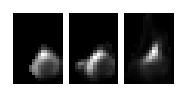

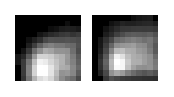

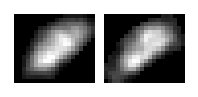

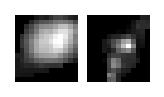

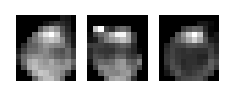

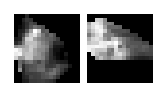

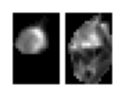

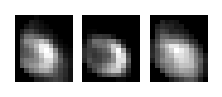

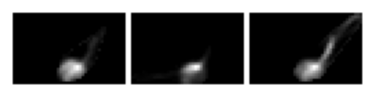

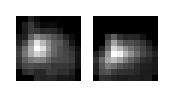

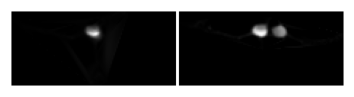

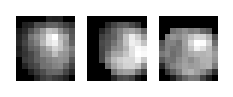

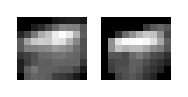

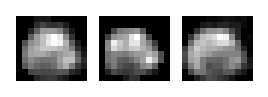

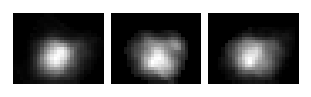

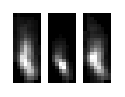

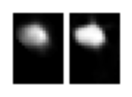

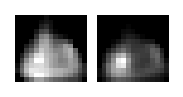

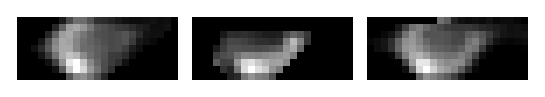

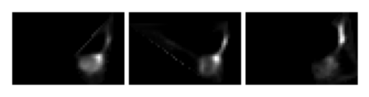

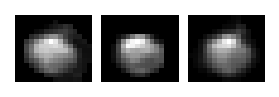

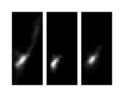

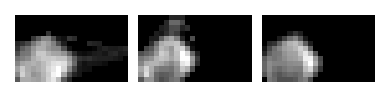

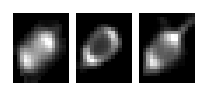

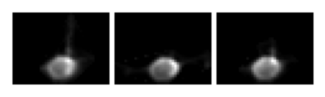

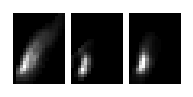

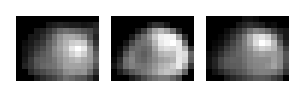

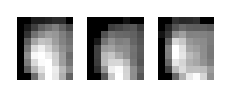

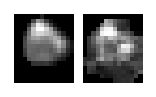

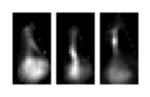

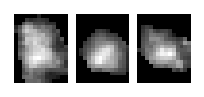

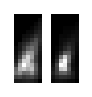

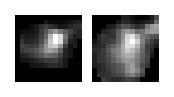

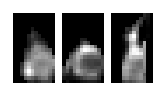

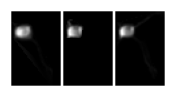

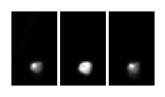

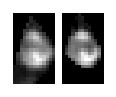

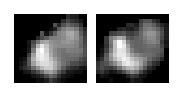

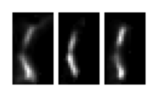

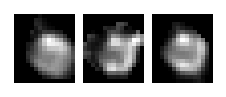

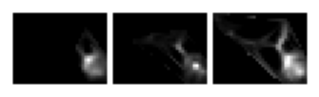

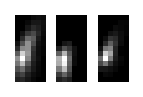

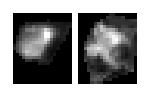

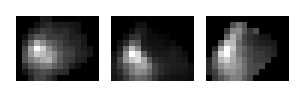

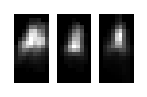

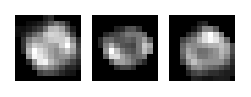

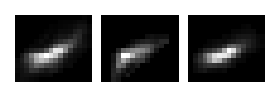

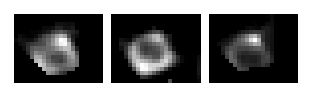

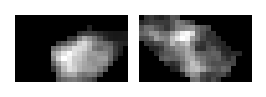

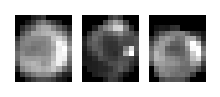

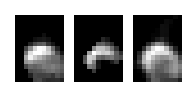

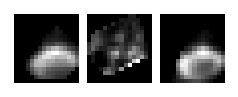

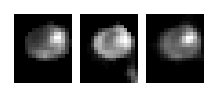

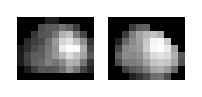

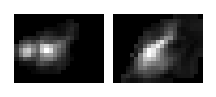

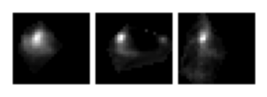

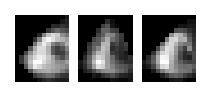

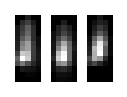

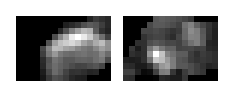

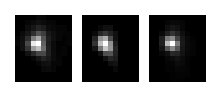

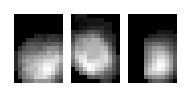

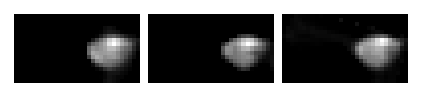

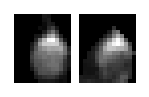

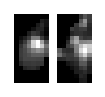

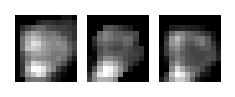

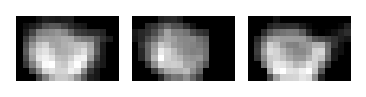

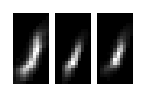

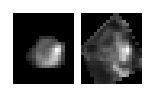

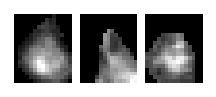

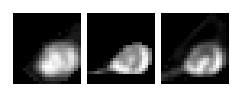

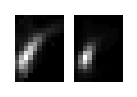

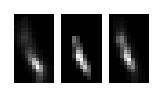

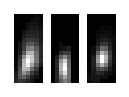

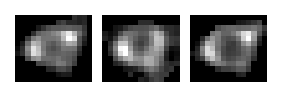

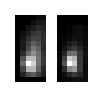

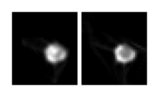

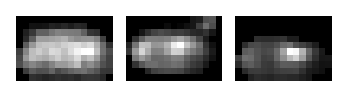

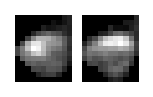

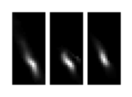

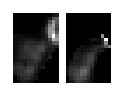

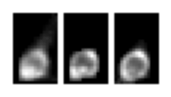

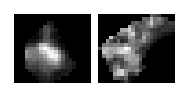

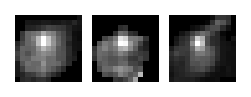

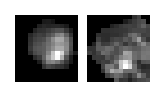

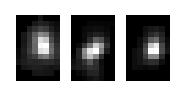

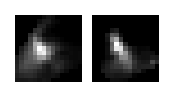

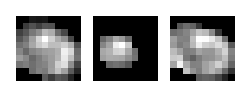

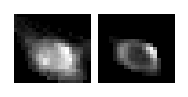

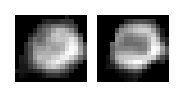

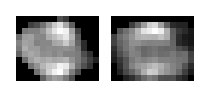

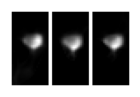

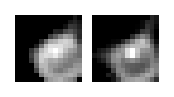

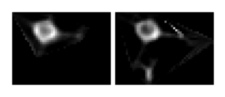

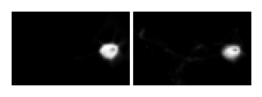

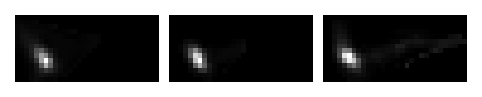

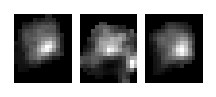

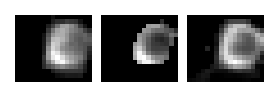

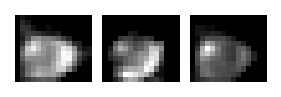

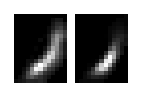

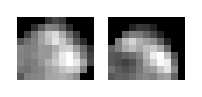

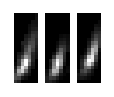

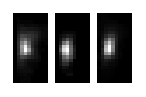

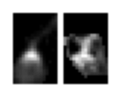

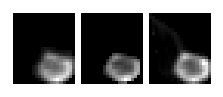

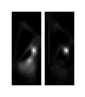

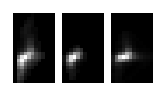

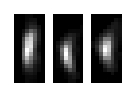

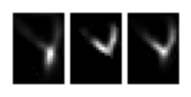

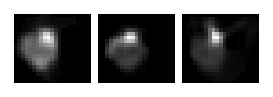

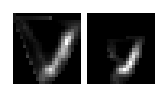

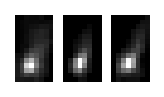

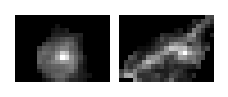

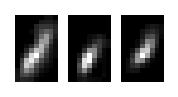

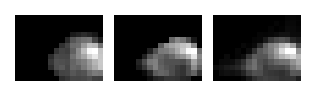

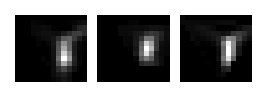

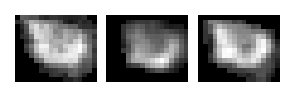

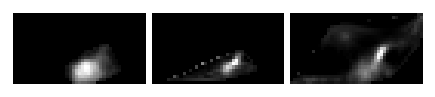

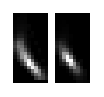

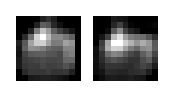

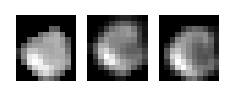

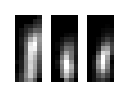

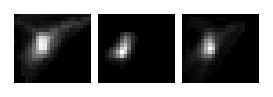

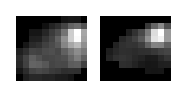

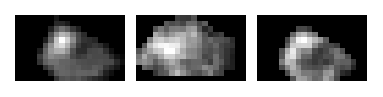

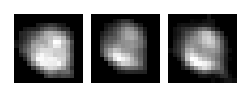

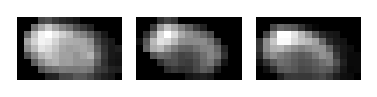

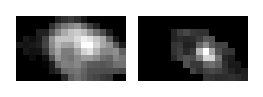

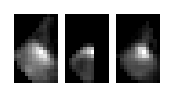

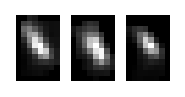

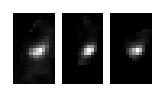

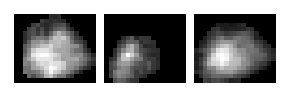

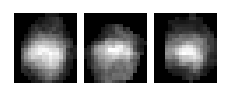

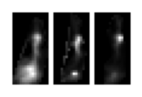

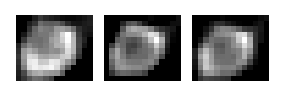

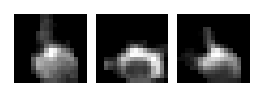

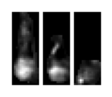

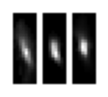

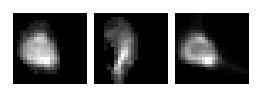

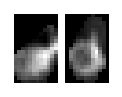

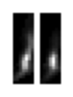

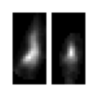

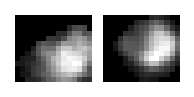

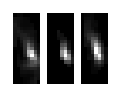

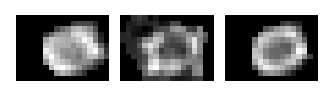

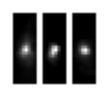

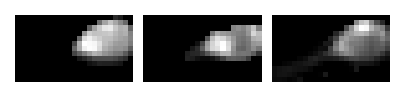

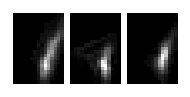

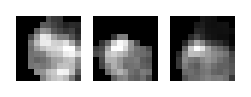

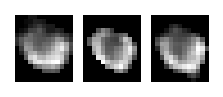

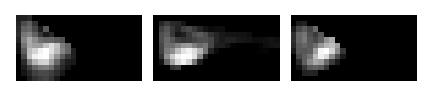

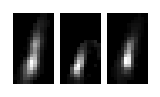

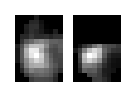

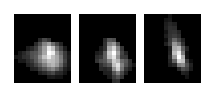

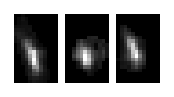

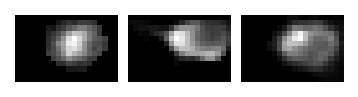

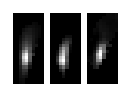

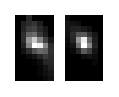

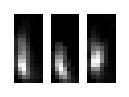

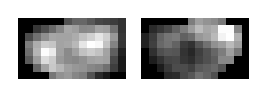

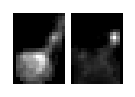

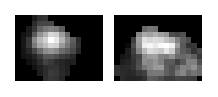

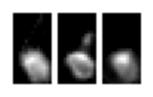

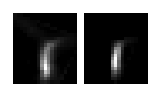

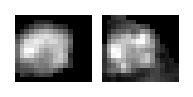

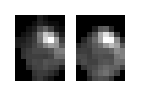

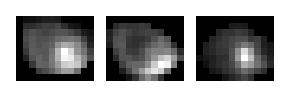

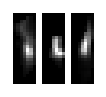

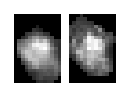

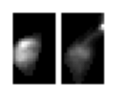

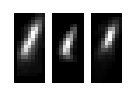

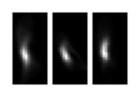

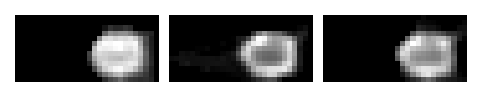

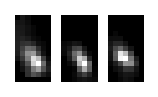

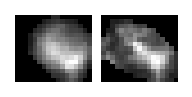

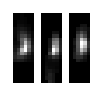

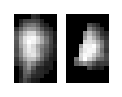

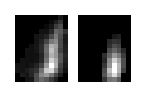

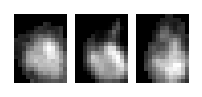

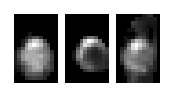

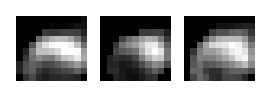

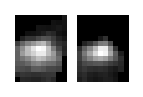

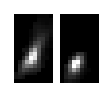

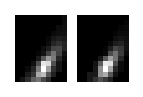

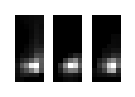

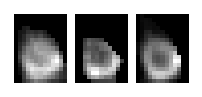

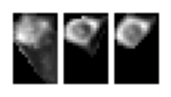

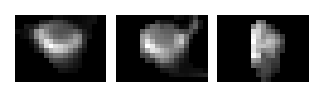

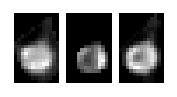

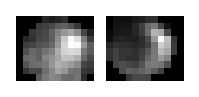

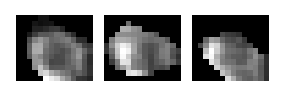

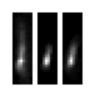

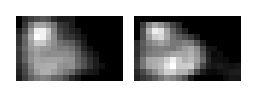

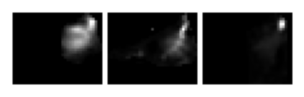

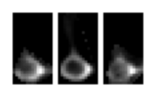

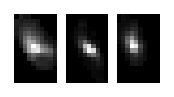

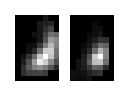

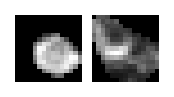

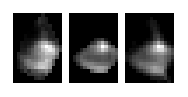

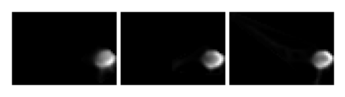

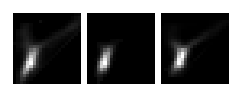

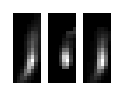

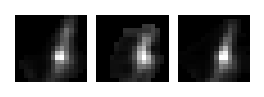

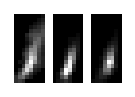

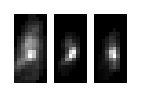

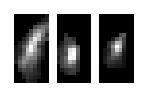

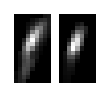

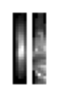

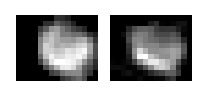

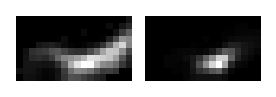

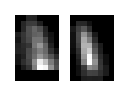

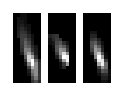

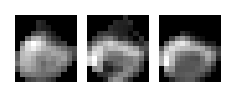

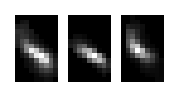

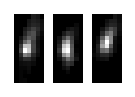

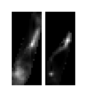

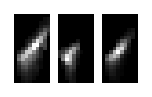

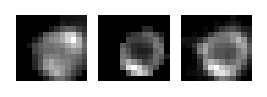

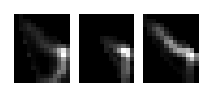

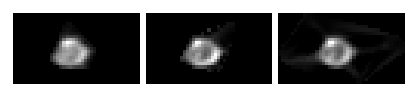

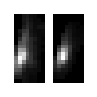

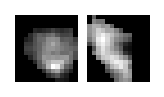

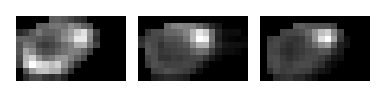

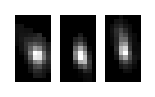

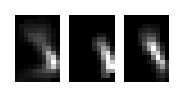

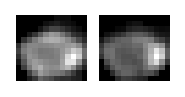

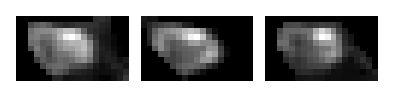

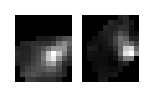

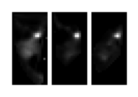

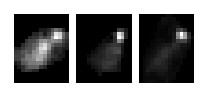

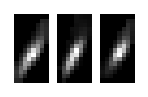

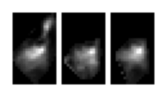

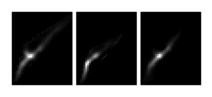

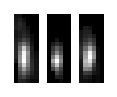

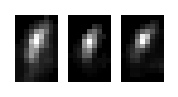

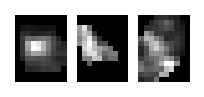

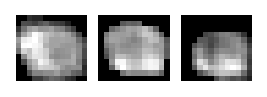

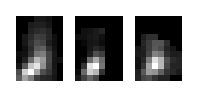

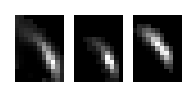

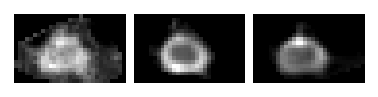

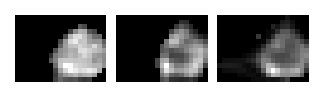

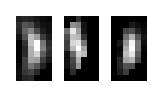

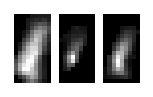

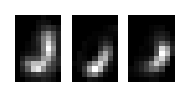

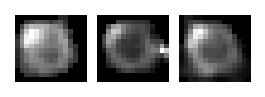

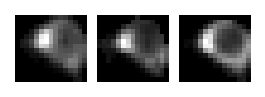

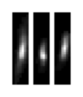

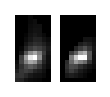

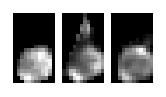

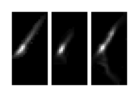

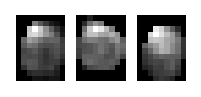

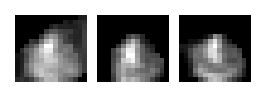

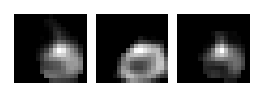

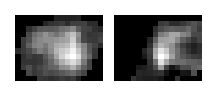

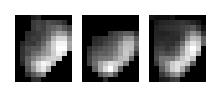

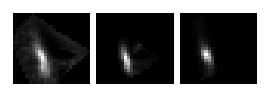

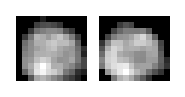

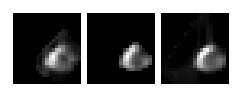

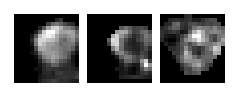

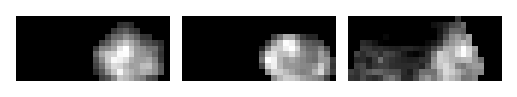

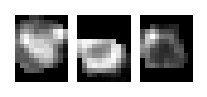

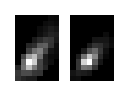

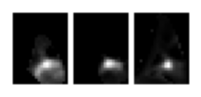

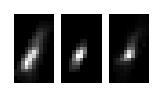

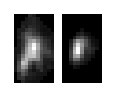

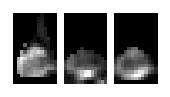

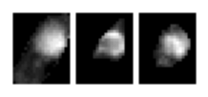

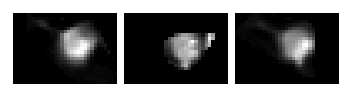

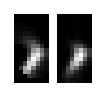

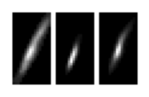

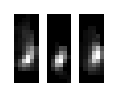

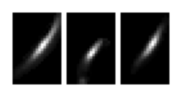

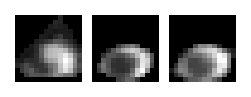

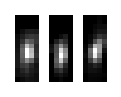

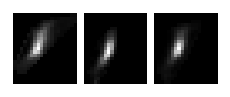

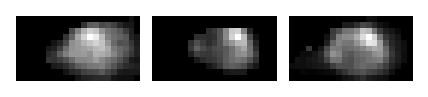

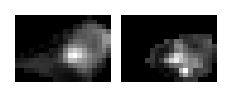

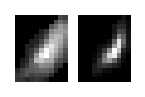

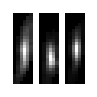

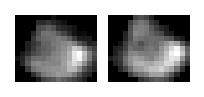

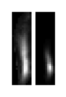

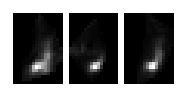

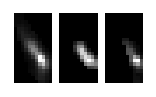

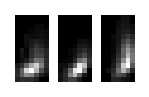

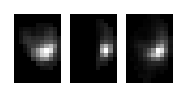

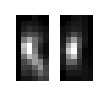

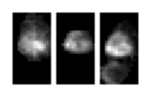

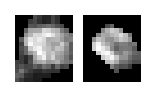

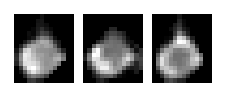

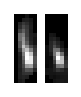

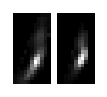

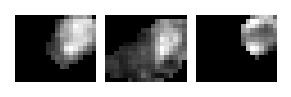

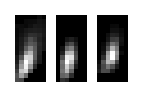

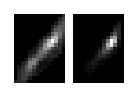

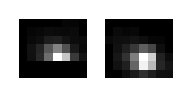

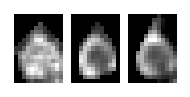

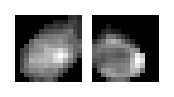

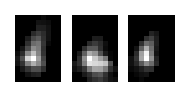

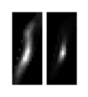

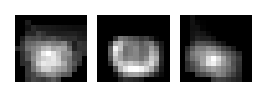

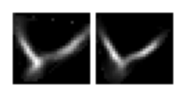

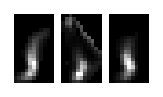

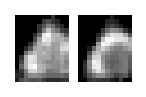

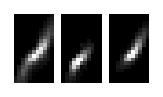

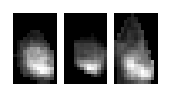

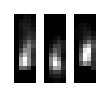

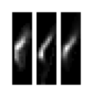

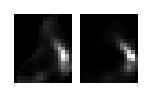

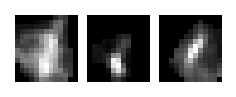

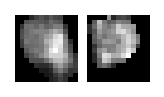

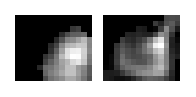

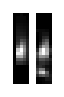

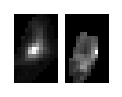

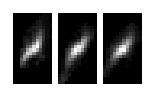

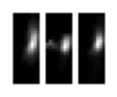

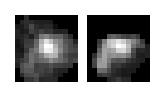

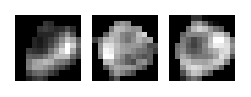

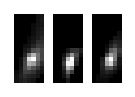

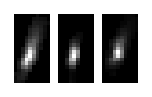

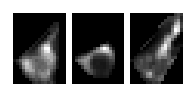

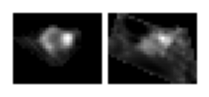

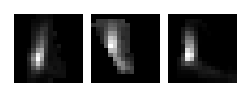

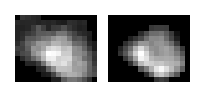

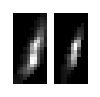

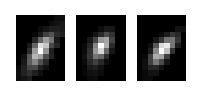

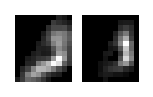

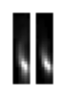

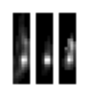

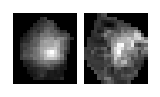

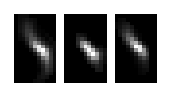

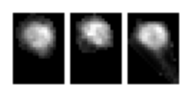

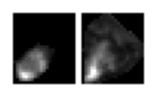

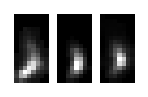

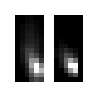

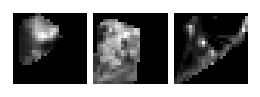

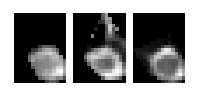

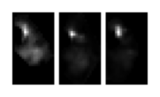

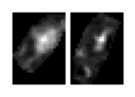

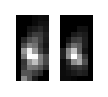

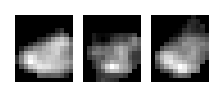

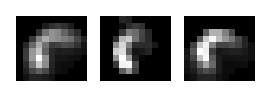

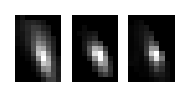

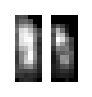

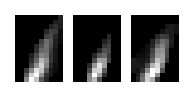

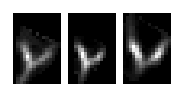

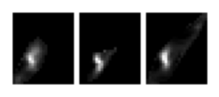

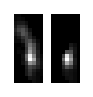

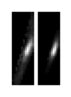

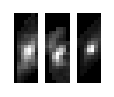

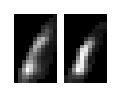

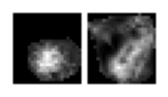

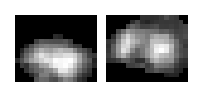

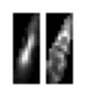

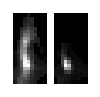

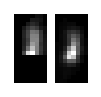

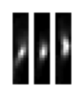

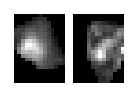

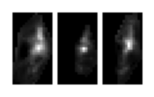

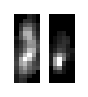

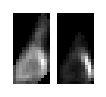

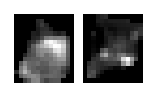

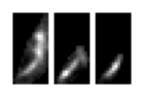

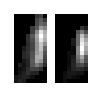

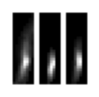

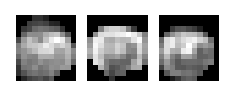

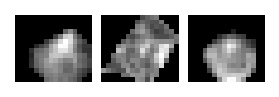

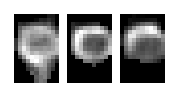

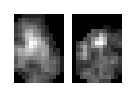

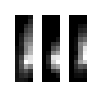

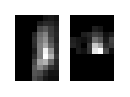

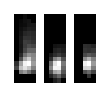

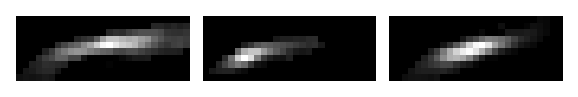

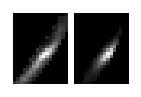

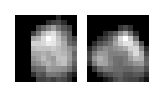

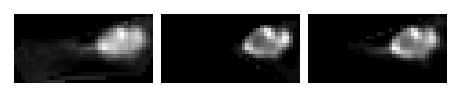

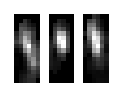

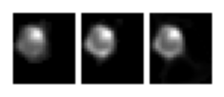

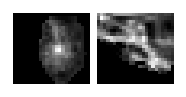

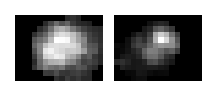

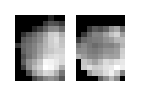

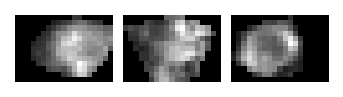

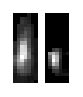

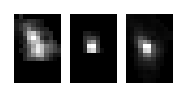

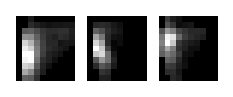

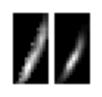

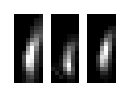

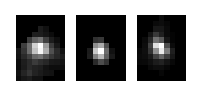

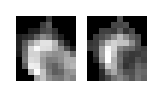

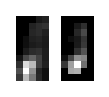

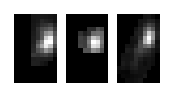

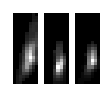

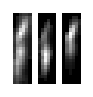

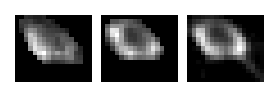

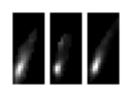

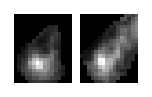

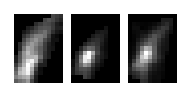

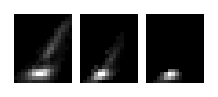

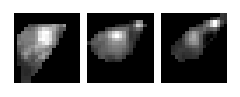

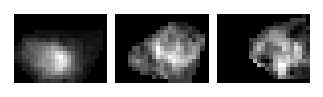

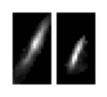

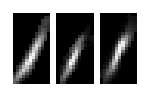

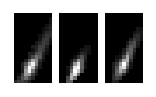

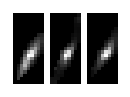

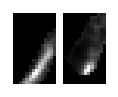

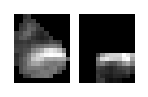

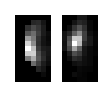

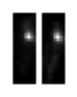

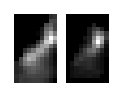

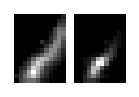

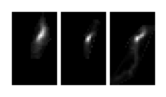

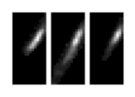

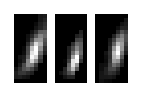

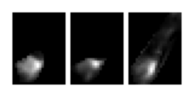

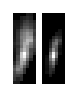

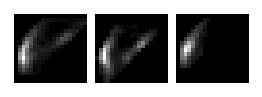

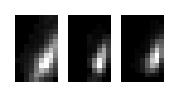

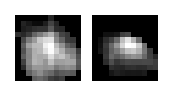

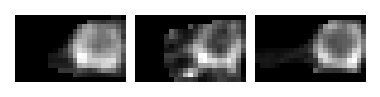

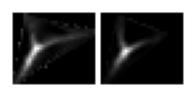

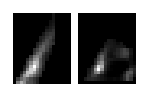

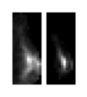

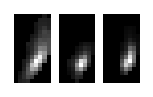

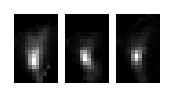

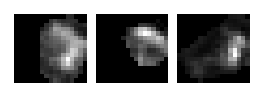

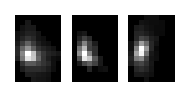

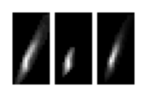

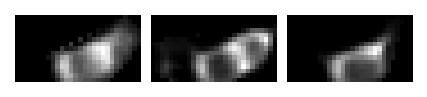

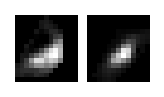

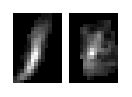

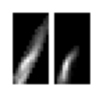

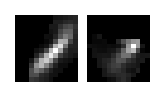

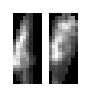

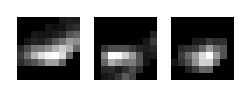

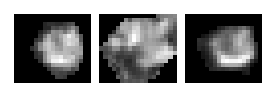

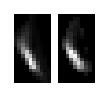

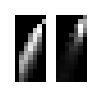

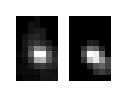

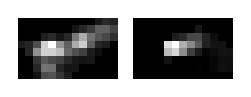

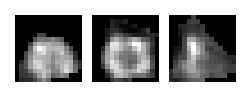

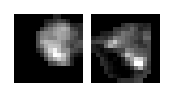

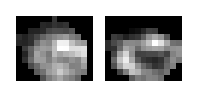

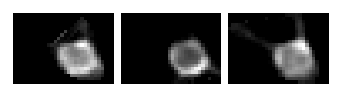

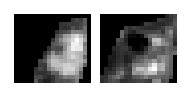

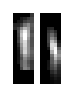

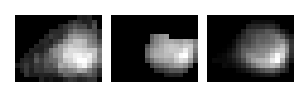

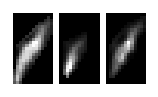

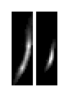

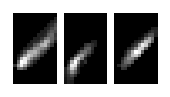

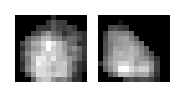

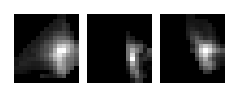

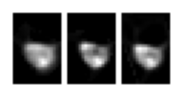

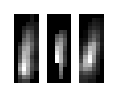

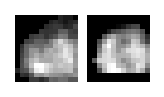

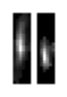

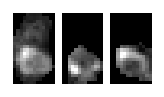

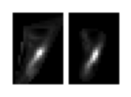

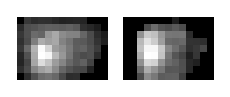

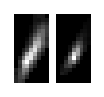

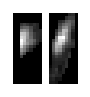

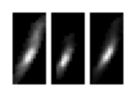

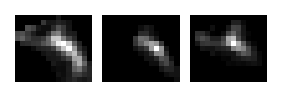

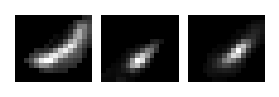

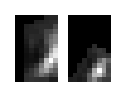

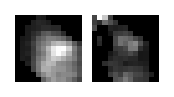

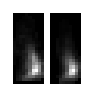

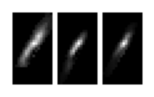

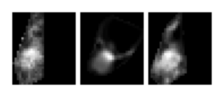

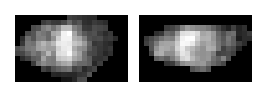

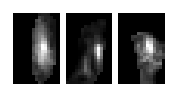

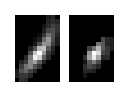

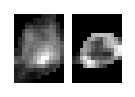

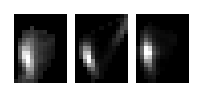

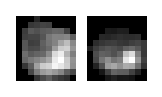

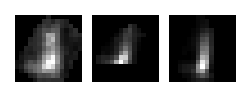

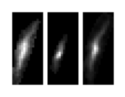

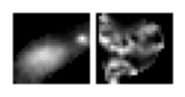

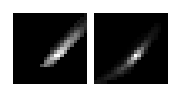

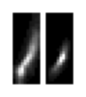

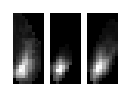

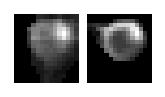

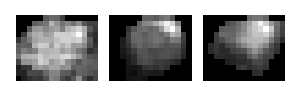

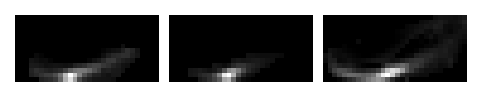

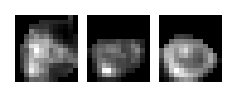

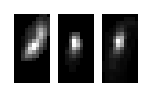

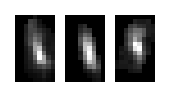

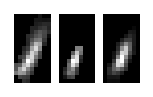

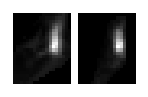

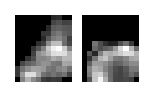

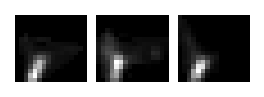

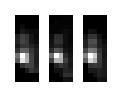

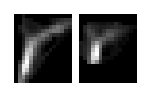

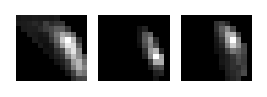

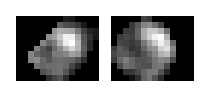

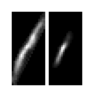

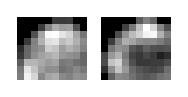

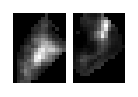

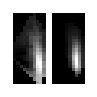

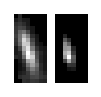

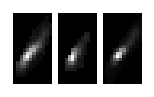

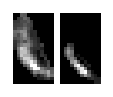

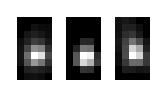

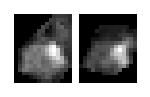

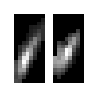

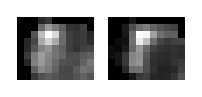

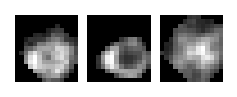

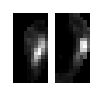

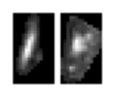

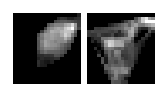

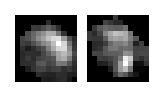

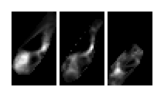

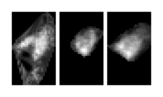

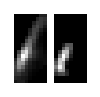

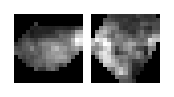

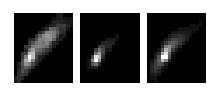

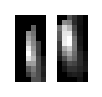

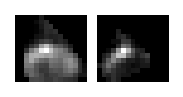

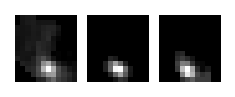

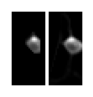

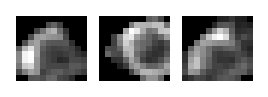

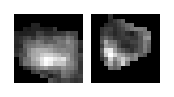

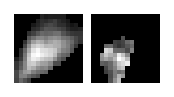

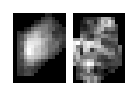

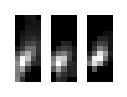

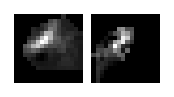

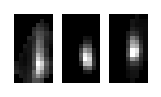

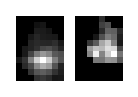

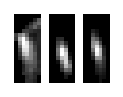

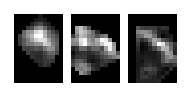

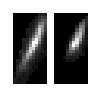

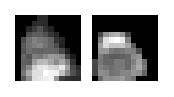

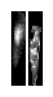

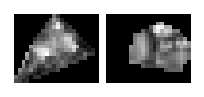

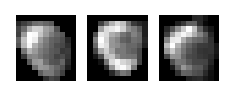

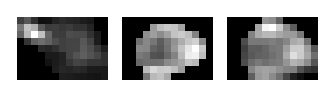

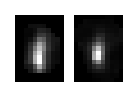

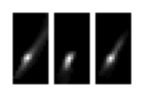

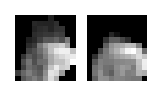

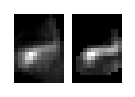

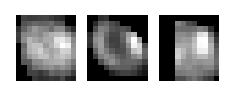

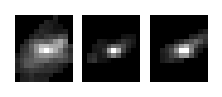

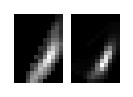

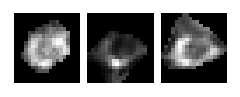

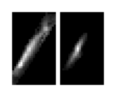

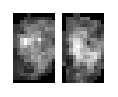

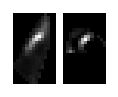

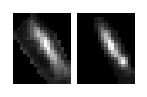

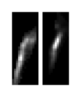

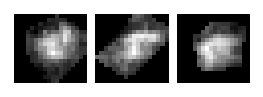

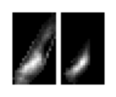

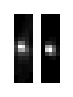

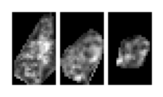

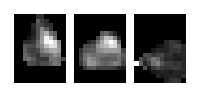

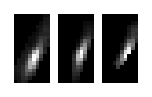

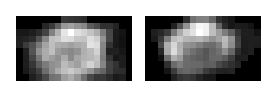

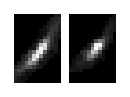

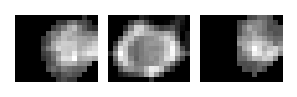

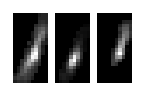

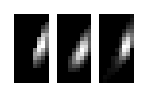

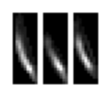

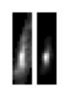

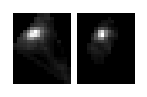

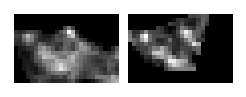

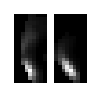

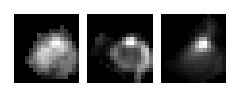

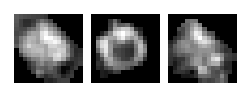

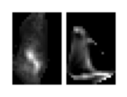

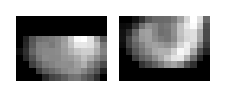

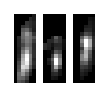

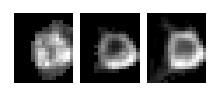

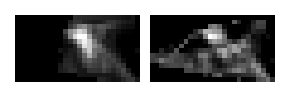

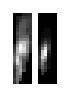

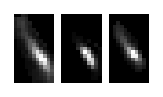

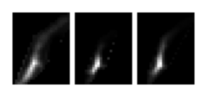

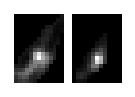

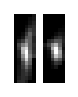

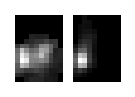

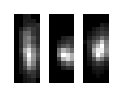

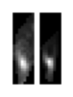

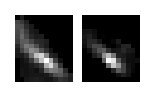

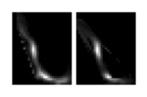

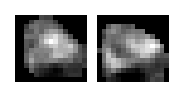

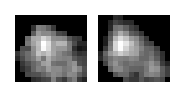

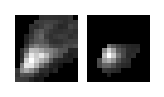

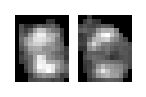

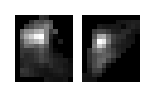

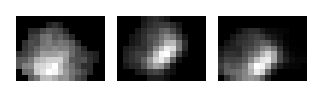

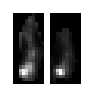

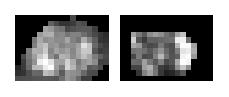

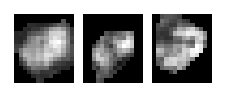

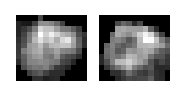

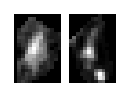

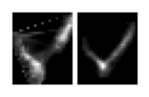

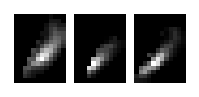

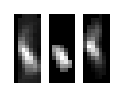

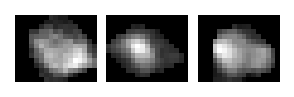

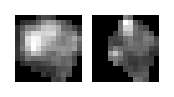

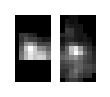

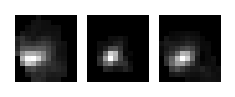

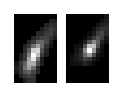

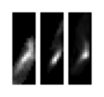

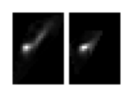

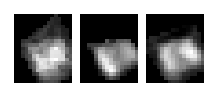

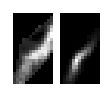

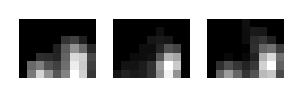

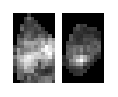

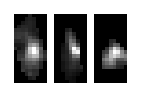

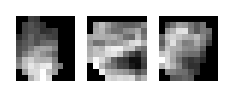

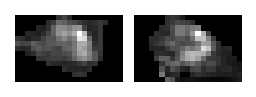

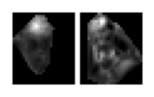

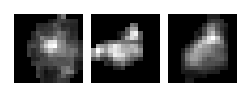

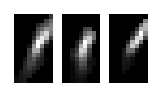

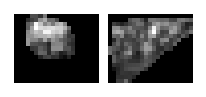

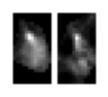

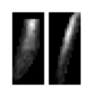

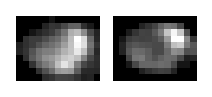

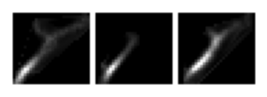

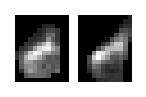

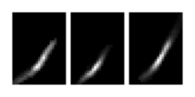

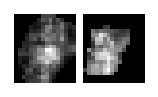

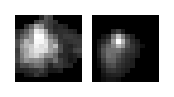

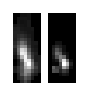

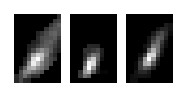

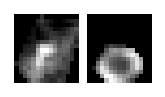

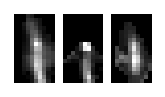

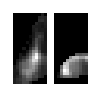

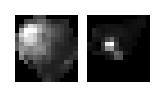

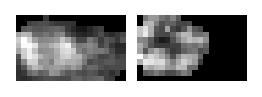

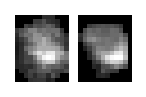

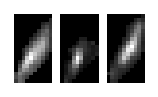

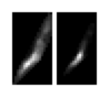

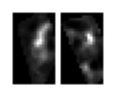

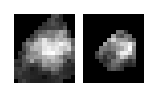

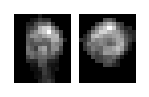

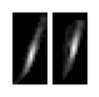

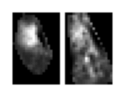

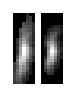

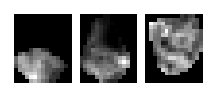

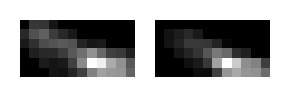

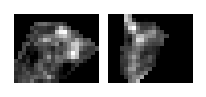

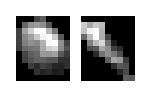

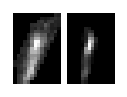

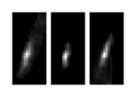

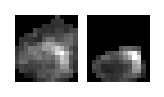

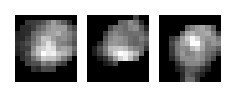

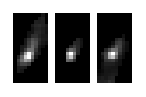

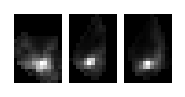

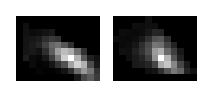

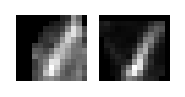

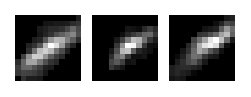

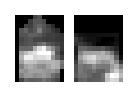

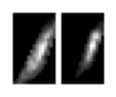

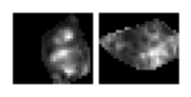

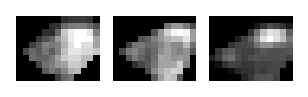

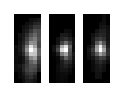

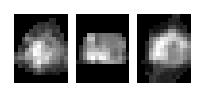

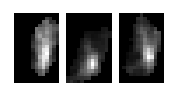

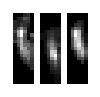

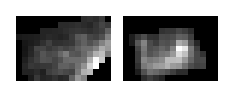

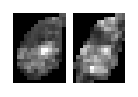

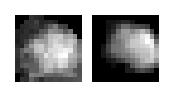

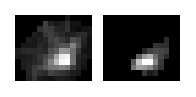

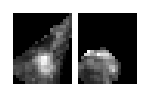

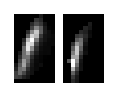

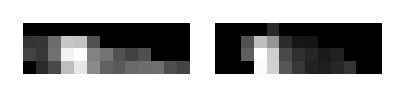

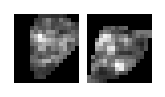

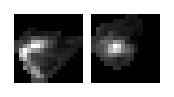

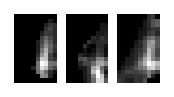

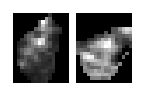

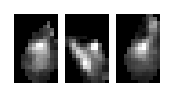

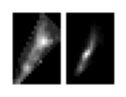

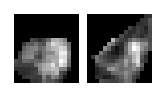

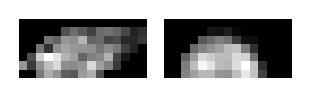

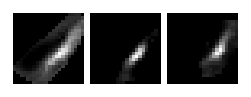

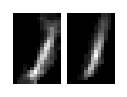

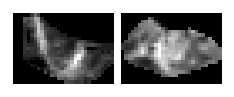

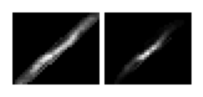

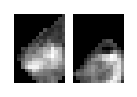

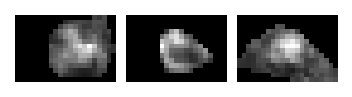

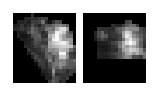

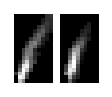

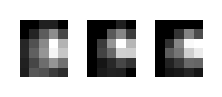

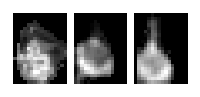

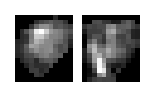

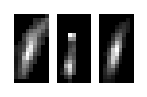

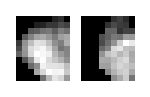

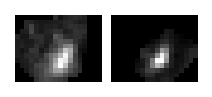

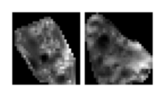

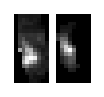

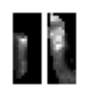

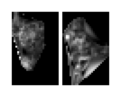

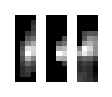

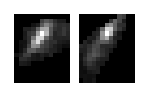

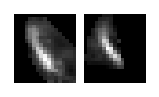

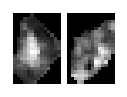

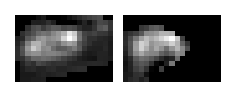

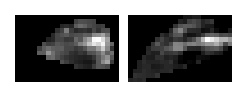

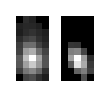

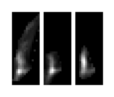

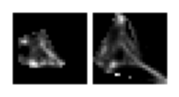

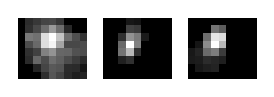

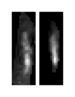

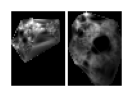

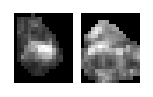

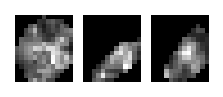

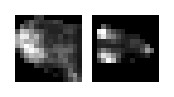

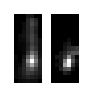

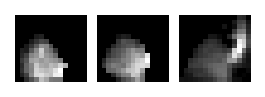

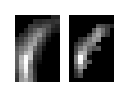

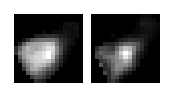

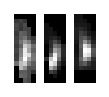

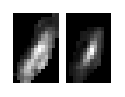

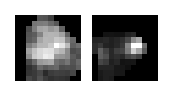

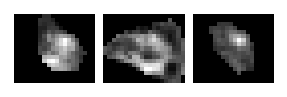

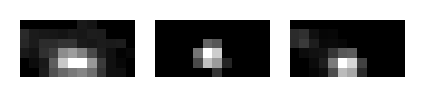

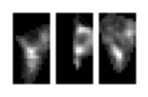

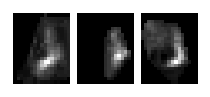

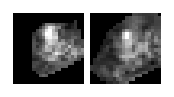

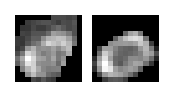

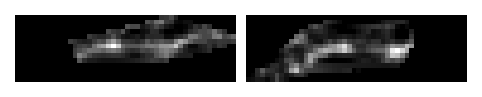

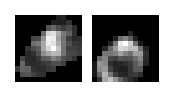

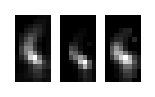

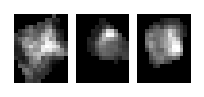

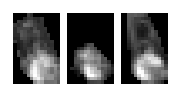

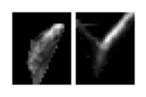

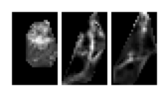

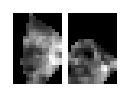

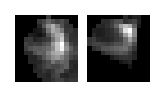

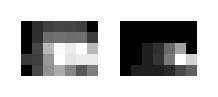

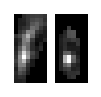

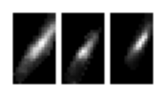

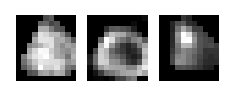

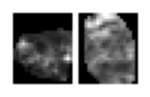

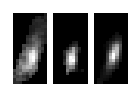

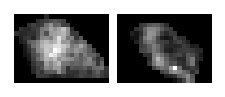

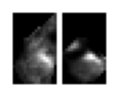

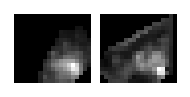

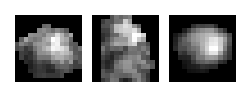

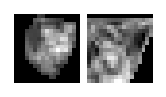

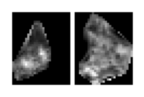

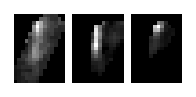

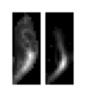

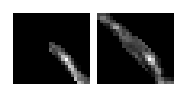

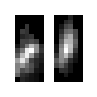

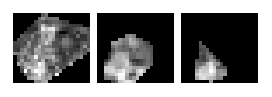

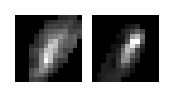

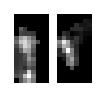

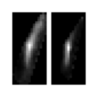

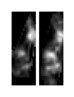

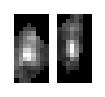

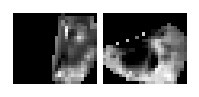

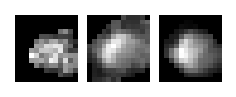

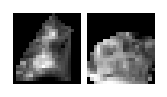

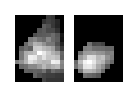

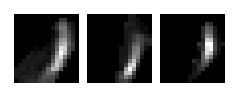

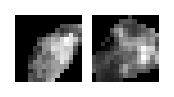

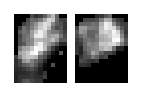

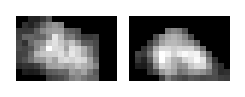

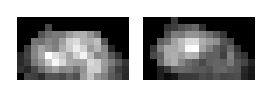

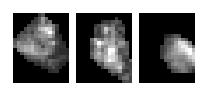

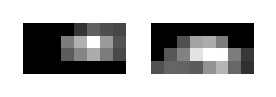

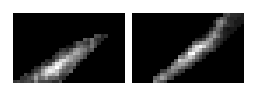

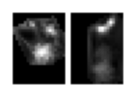

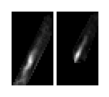

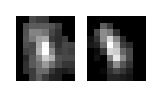

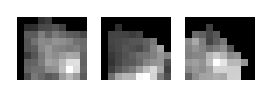

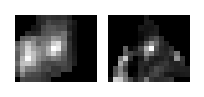

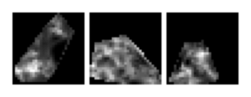

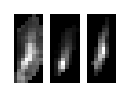

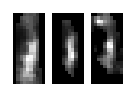

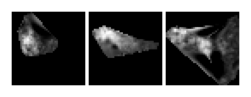

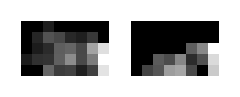

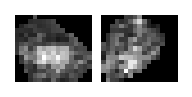

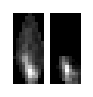

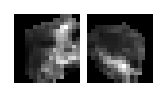

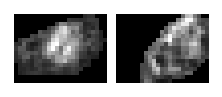

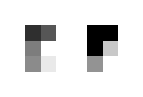

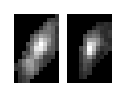

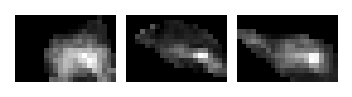

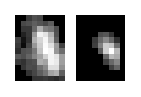

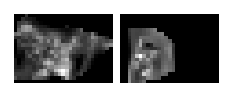

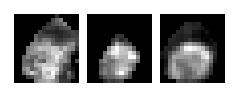

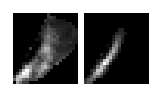

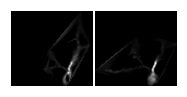

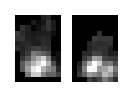

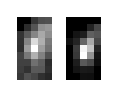

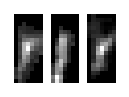

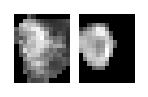

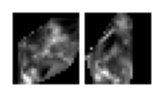

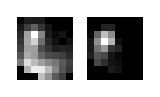

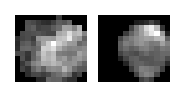

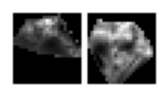

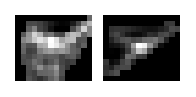

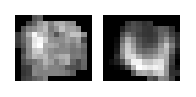

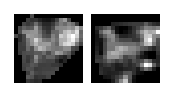

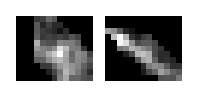

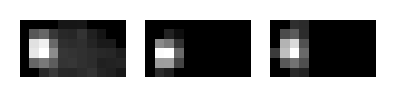

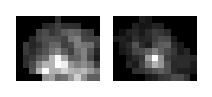

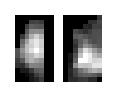

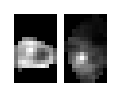

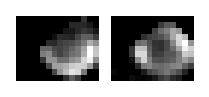

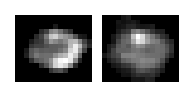

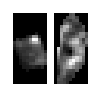

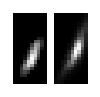

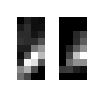

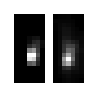

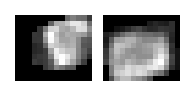

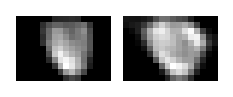

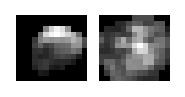

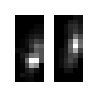

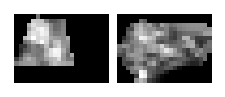

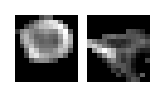

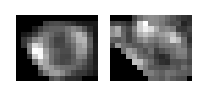

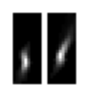

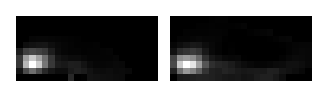

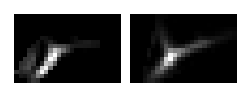

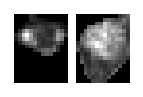

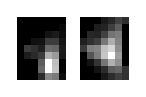

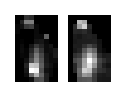

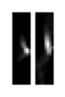

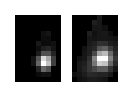

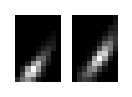

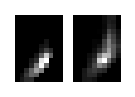

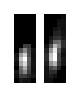

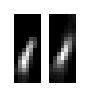

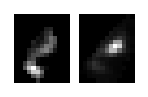

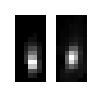

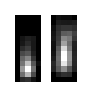

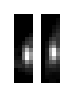

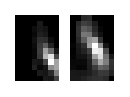

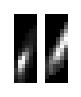

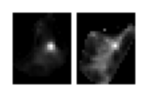

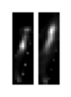

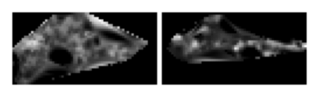

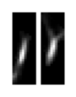

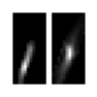

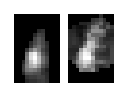

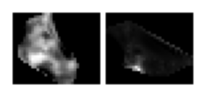

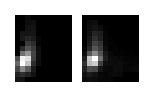

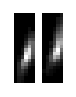

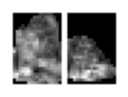

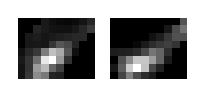

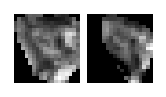

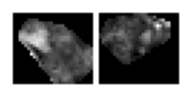

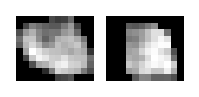

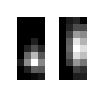

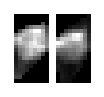

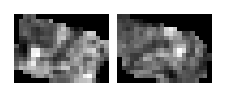

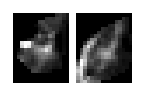

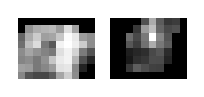

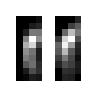

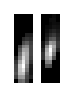

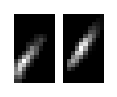

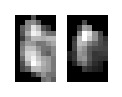

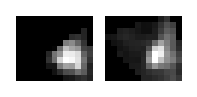

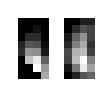

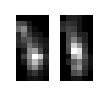

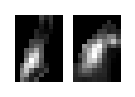

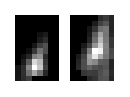

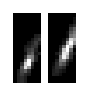

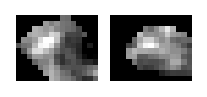

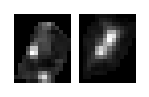

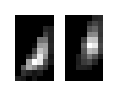

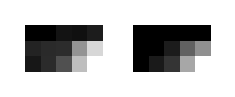

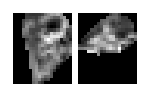

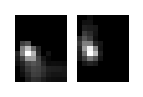

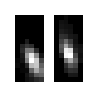

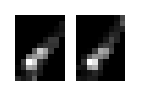

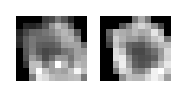

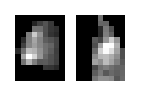

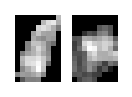

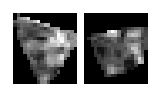

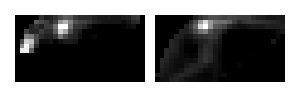

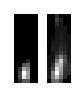

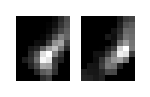

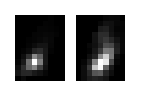

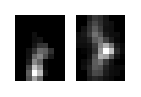

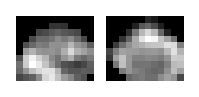

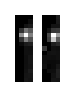

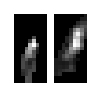

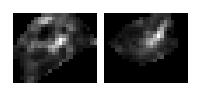

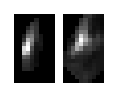

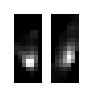

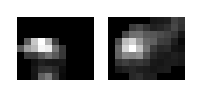

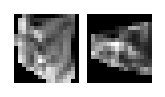

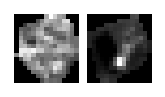

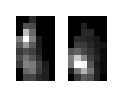

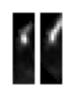

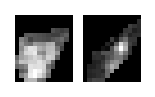

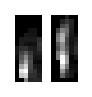

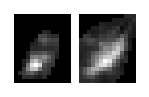

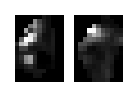

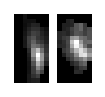

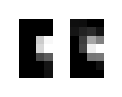

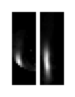

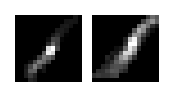

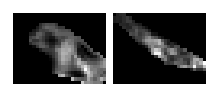

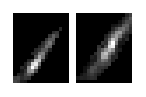

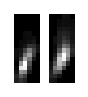

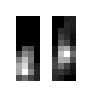

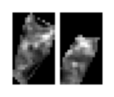

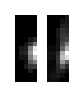

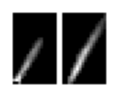

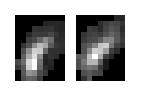

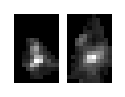

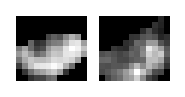

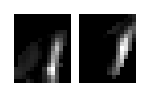

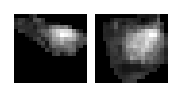

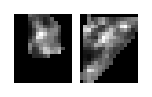

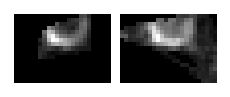

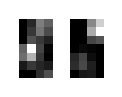

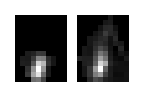

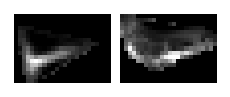

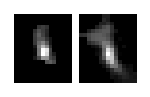

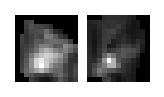

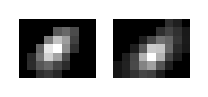

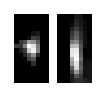

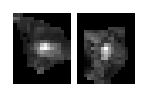

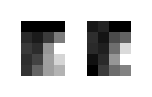

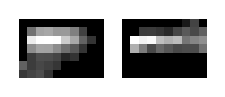

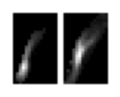

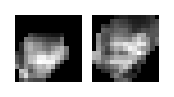

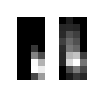

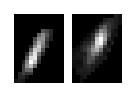

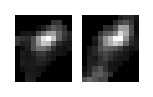

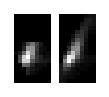

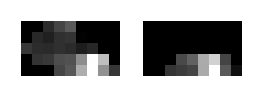

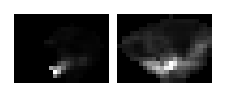

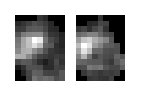

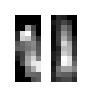

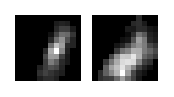

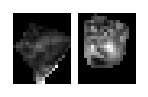

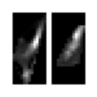

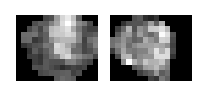

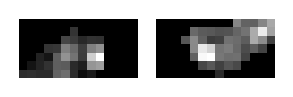

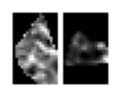

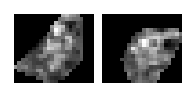

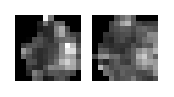

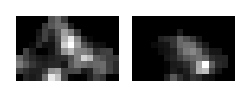

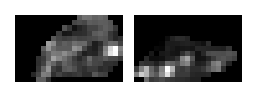

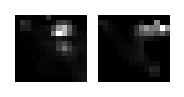

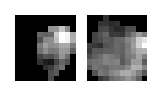

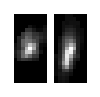

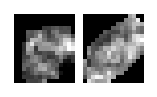

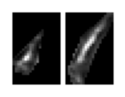

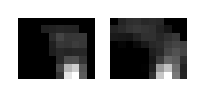

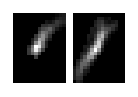

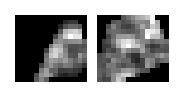

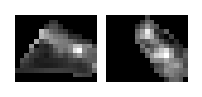

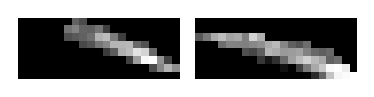

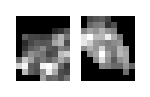

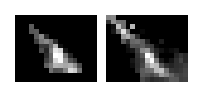

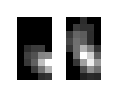

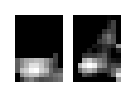

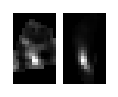

In [245]:
import scipy.sparse

ucids = labels.copy()
# ucids = ucids[ucids==975]
ucids_unique = np.unique(ucids[ucids>-1])

# ROI_ims = np.concatenate(data.ROI_images, axis=0)
ROI_ims_sparse = scipy.sparse.vstack(aligner.ROIs_aligned)
ROI_ims_sparse = ROI_ims_sparse.multiply( ROI_ims_sparse.max(1).power(-1) ).tocsr()


ucid_sfCat = []
for ucid in ucids_unique:
    idx = np.where(ucids == ucid)[0]
    ucid_sfCat.append( np.concatenate(list(roicat.visualization.crop_cluster_ims(ROI_ims_sparse[idx].toarray().reshape(len(idx), data.FOV_height, data.FOV_width))), axis=1) )
#     ucid_sfCat.append( np.concatenate(list(ROI_ims_sparse[idx].toarray().reshape(len(idx), data.FOV_height, data.FOV_width)), axis=1) )
# data.ROI_images[i_sesh][idx] for 


%matplotlib inline

for sf in ucid_sfCat:#[:100]:
    plt.figure(figsize=(40,1))
    plt.imshow(sf, cmap='gray')
    plt.axis('off')

In [246]:
y, x = np.histogram(counts_x,bins=data.n_sessions,range=(1,data.n_sessions+1))
print(y)
print(x)

[2191  609  490]
[1. 2. 3. 4.]


<IPython.core.display.Javascript object>


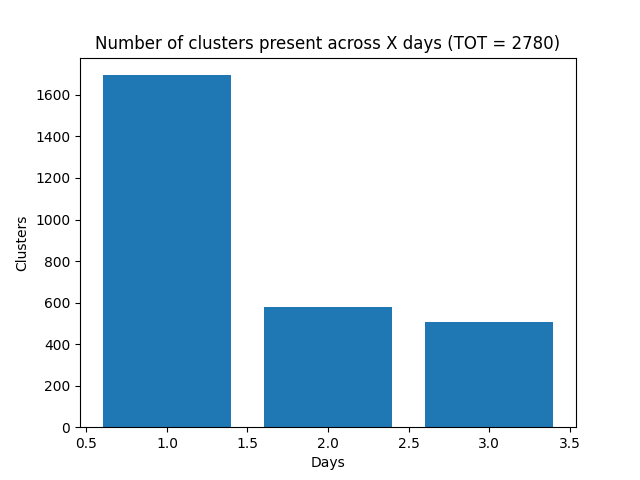

In [247]:
%matplotlib notebook

_, counts = np.unique(labels, return_counts=True)
counts_x = np.concatenate((counts[1:],np.ones(counts[0])),axis=0) #add counts of unique ROIs appearing in one session only
y, x = np.histogram(counts_x,bins=data.n_sessions,range=(1,data.n_sessions+1))
fig = plt.figure()
#plt.hist(counts_x, 20, range=(0.8, data.n_sessions+1))
#plt.hist(counts_x, data.n_sessions+1, range=(1, data.n_sessions+1))
plt.bar(x[:-1],y)
plt.title('Number of clusters present across X days (TOT = ' + str(len(counts_x)) + ')')
plt.xlabel('Days')
plt.ylabel('Clusters')

path_save_svg = dir_save / (name_save + '.ROICaT.ClustersPerNrOfDays.session' + '.svg')
plt.savefig(path_save_svg, dpi=150)

In [169]:
toc['visualize'] = time.time() - tic

# Save results

In [248]:
# dir_save = Path('/home/rich/Desktop/').resolve()
dir_save = Path(dir_allOuterFolders).resolve()
name_save = Path(dir_allOuterFolders).resolve().name
#name_save = 'SP035'
# path_save = dir_save / (name_save + '.ROICaT.tracking.results' + '.pkl')
# path_save = dir_save / (name_save + '.ROICaT.tracking.results.DAY0_2' + '.pkl')
path_save_pkl = dir_save / (name_save + '.ROICaT.tracking.results' + '.pkl')
path_save_mat = dir_save / (name_save + '.ROICaT.tracking.results' + '.mat')

print(f'path_save_pkl: {path_save_pkl}')
print(f'path_save_mat: {path_save_mat}')

path_save_pkl: C:\Users\Samuel\Documents\2PI\SP035\RepSite2_chronic\RepSite2_chronic.ROICaT.tracking.results.pkl
path_save_mat: C:\Users\Samuel\Documents\2PI\SP035\RepSite2_chronic\RepSite2_chronic.ROICaT.tracking.results.mat


In [114]:
import scipy.io

ROIs = {
    "ROIs_aligned": aligner.ROIs_aligned,
    "ROIs_raw": data.spatialFootprints,
    "frame_height": data.FOV_height,
    "frame_width": data.FOV_width,
    "idx_roi_session": np.where(data.sessionID_concat)[1]
}

results = {
    "UCIDs": labels,
    "UCIDs_bySession": labels_bySession,
    "ROIs": ROIs,
    "input_data": {
        "paths_stat": data.paths_stat,
        "paths_ops": data.paths_ops,
    }
}

roicat.helpers.pickle_save(
    obj=results,
    path_save=path_save_pkl,
    mkdir=True,
)

scipy.io.savemat(path_save_mat,results)

C:\Users\Samuel\AppData\Roaming\Python\Python39\site-packages\scipy\io\matlab\_mio5.py:493: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  narr = np.asanyarray(source)


In [249]:
import scipy.io

# dir_save = Path('/home/rich/Desktop/').resolve()
dir_save = Path(dir_allOuterFolders).resolve()
name_save = Path(dir_allOuterFolders).resolve().name
#name_save = 'SP035'
# path_save = dir_save / (name_save + '.ROICaT.tracking.results' + '.pkl')
# path_save = dir_save / (name_save + '.ROICaT.tracking.results.DAY0_2' + '.pkl')
path_save_pkl = dir_save / (name_save + '.ROICaT.tracking.results' + '.pkl')
path_save_mat = dir_save / (name_save + '.ROICaT.tracking.results' + '.mat')

# META = {
#     "useMouse": useMouse,
#     "useDates": useDates,
#     "useSessions": useSessions,
#     "usePlane": usePlane
# }
ROIs = {
    "ROIs_aligned": aligner.ROIs_aligned,
    "ROIs_raw": data.spatialFootprints,
    "frame_height": data.FOV_height,
    "frame_width": data.FOV_width,
    "idx_roi_session": np.where(data.sessionID_concat)[1]
}
ALIGN = {
    "geometric_shifts": geo_out,
    "nonrigid_shifts": nonrigid_out,
}
results = {
    "UCIDs": labels,
    "UCIDs_bySession": labels_bySession,
    "ALIGN": ALIGN,
    "ROIs": ROIs,
#    "META": META,
}

roicat.helpers.pickle_save(
    obj=results,
    path_save=path_save_pkl,
    mkdir=True,
)

scipy.io.savemat(path_save_mat, mdict=results)

C:\Users\Samuel\AppData\Roaming\Python\Python39\site-packages\scipy\io\matlab\_mio5.py:493: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  narr = np.asanyarray(source)


In [173]:
toc['saving'] = time.time() - tic

In [174]:
toc

{'start': 0.0,
 'import_paths': 62.66244673728943,
 'import_data': 63.715426445007324,
 'alignment': 3578.919254541397,
 'blur': 3586.7765226364136,
 'NN': 3661.241682767868,
 'SWT': 3662.424273967743,
 'sim': 3669.9654479026794,
 'separate_diffSame': 3673.5896010398865,
 'clustering': 3679.766905784607,
 'visualize': 3775.7164068222046,
 'saving': 3824.589097738266}

968